# Summary of Findings (EDA)

## Leading Question 
What are the characteristics that will lead to higher impressions per spend?

### Introduction
We want to use the data of the snapchat's political advertisement to find the elements that is related to high efficiency. High efficiency means there are more impressions per spend. By doing so, we will help the advertisers to gain a general idea about how they should provide their advertisments in order to gain more views using less money.

### Cleaning and EDA
We first clean the data and do some data exploration to find the elements we want to track. we use univariate, bivariate, and aggregation to explore the data 
1. we convert the 'StartDate' and 'EndDate' to datetime object for future exploration.
2. `univariate/aggregate`: we do some exploration on the most prevalent value on some columns include organization name and paying advertisement name.
3. `bivariate`:using the corr( ) function to find the correlation among columns, we find out that the spend column has a strong positive correlation with impression column.
4. `univariate`:plotting the histograms of the spend column and impression column, the histograms look really similar.
5. `bivariate`:Then, we plot the scatterplot plot of the two columns and we find out it also confirms our idea that spend and impression have a strong positive correlation.
6. we now come up the idea of the efficiency and we start to form the efficiency column for the table, which is the impression devided by the spend. We find out that there are twelve columns that have spend equals to 0 and we change it into 1 in order to avoid future errors.

### Assessment of Missingness
We then divide the data into high efficiency group (top 75% of the dataset) and low efficiency group (last 25% of the dataset) and find there difference in missingness value. We find out that they have a huge difference in columns 'Segments', 'EndDate', and 'CreativeProperties'.
#### Permutation Test on Missingness using the difference of efficiency mean 
We use the difference of the efficiency mean to analyze the dataset, we try six different permutation test on columns 'Segments', 'EndDate', and 'CreativeProperties' and with dataset High Efficiency and Low Efficiency.
1. `Null Hypothesis`: the missingness and the non-missingness data of a specific column with respect to efficiency come from the same distribution.
2. `Alt Hypothesis`: the missingness and the non-missingness data of a specific column with respect to efficiency come from different distribution.
3. `Test statistics`: absolute difference of the efficiency mean
4. `Conclusion`: we find out that all the columns are MCAR to High Efficiency dataset but MAR or NMAR to Low Efficiency dataset with respect to efficiency.

#### Final Conclusion of Missingness
We think that Segments and CreativeProperties are `MCAR` in high efficiency dataset because Ads with high efficiency usually won't intentionally seek for audiences because they already have their own pool of audiances. Therefore, they don't really need to recruit audiences by actively searching them(such as using Snap Audience match) or setting up websites to promote the Ads(website to call for action). The permutation test shows that those columns are `not dependent` with Efficiency column

Segments and CreativeProperties might be `MAR` or `NMAR` in low efficiency dataset because Ads with low efficiency generally wants to recruit more audiences in order to increase their efficiency. The permutation test shows that those columns might `dependent` with Efficiency column


### Hypothesis Test
After exploring the missingness of the dataset, we want to further understand would other columns affect the efficiency. We find out for lots of columns, their NaN value have some meaning. 
We choose 'Language' and 'Interests' as two columns to develop future analyze.
According to 'Readme.txt', the meaning of NaN in 'Language' column means that the advertisement does not have a specific target of language. Thus, we separate the 'Language' column into two categories, one category is having a specific target of language and another is not having a target.
We do the same thing to 'Interests' column. We separate the 'Interests' column into 'Having target on certain interests group' with 'To general people' according to 'Readme.txt'
#### Permutation Test on Missingness using the difference of efficiency mean 
We use the difference of the efficiency mean to analyze the dataset on 'Language' and 'Interests' columns
1. `Null Hypothesis`: the value does not effect the efficiency
2. `Alt Hypothesis`: the value will lead to higher efficiency
3. `Test statistics`: difference of the efficiency mean
4. `Conclusion`: we find out that the columns will lead to higher efficiency

We do more exploration to verify our answer

#### Ploting the distribution
We define a function that can help us plot the distribution of the specific target vs non-specific target.
We find out that for the dataset, the distributions are not much similar for both columns.

#### Permutation Test on Missingness using the ks-statistic
We use the ks-statistic to analyze the dataset on 'Language' and 'Interests' columns
1. `Null Hypothesis`: the value does not effect the efficiency
2. `Alt Hypothesis`: the value will lead to higher efficiency
3. `Test statistics`: ks-statistic
4. `Conclusion`: we find out that the columns will lead to higher efficiency

#### Final Conclusion on Hypothesis test
We find out that if we target a specific group of people on a certain area like using a specific kind of language or having a specific interest might lead to higher efficiency on their advertisements on internet. 

#### Remark
Still, it seems that more spend lead to more impressions and thus more efficiency. Therefore, spend is the major effector for efficiency. Therefore, most comapanies would maximize their ads reach through spending. The high efficiency ads tend to not run low on budget since most of them are supported by large companies. However, for ads with low efficiency that are limitted in budget, finding ways to recruit the audiences(indicated in Segments and CreativeProperties) without injecting more money are generally executed by those Ads.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

##### Reading Data
Before doing anything, we first have to examine the data. First, we read in Political Ads data from year 2018 and 2019 and combine them into a single dataframe. Then, we check the types of the data as well as the number of null values inside each column.

In [3]:
# import the two csv file and add them into one dataframe

# import the advertisement file of 2018
fp_2018 = os.path.join('data', 'PoliticalAds_2018.csv')
ads_2018 = pd.read_csv(fp_2018)

# import the advertisement file of 2019
fp_2019 = os.path.join('data', 'PoliticalAds_2019.csv')
ads_2019 = pd.read_csv(fp_2019)

# merge two table together and reset the index
ads = pd.concat([ads_2018,ads_2019]).reset_index()

# print some basic information of the table
print("ads_2018: " + str(ads_2018.shape), "ads_2019: " + str(ads_2019.shape), "combined: " + str(ads.shape))

ads.head()

ads_2018: (659, 27) ads_2019: (2630, 27) combined: (3289, 28)


,index,ADID,CreativeUrl,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Interests,OsType,Segments,LocationType,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),Targeting Geo - Postal Code,CreativeProperties
0,0,68189125240c16e3dcec398a7b4e040e74621ccf11df25...,https://www.snap.com/political-ads/asset/b2d0c...,2,1301,2018/08/22 15:00:40Z,2018/09/09 12:30:23Z,Context Media,"Västra Norrlandsgatan 7 ,UMEÅ,90327,SE",NaN,...,NaN,NaN,Provided by Advertiser,NaN,sv,NaN,NaN,NaN,NaN,web_view_url:http://www.socialdemokraterna.nu/...
1,1,3542d40ba9fb0f0aa52889b03ea4a7db64ee4a3687aa6e...,https://www.snap.com/political-ads/asset/bc5a0...,143,49094,2018/09/12 10:01:00Z,2018/09/15 17:59:00Z,Congressman Pete King,US,NaN,...,"Political News Watchers,ZZ_Deprecated_1",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,"11701,11702,11706,11705,11714,11715,11716,1171...",web_view_url:http://peteking.com/2018campaignf...
2,2,6d1eb1af8c01a43def7b695fd19f2c43fa6625d126a063...,https://www.snap.com/political-ads/asset/d9367...,1913,886571,2018/10/21 22:19:57Z,2018/11/05 23:17:28Z,Ohio Democratic Party,US,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"44313,44306,44325,44601,44805,44004,45701,4412...",web_view_url:https://IWillVote.com/OH
3,3,64d906646b616c034c91b69b9e7851944844eb456dd203...,https://www.snap.com/political-ads/asset/e56c0...,56,11770,2018/09/28 23:10:14Z,2018/10/17 02:00:00Z,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,...,NaN,NaN,Provided by Advertiser,NaN,NaN,Marital Status (Single),NaN,NaN,NaN,web_view_url:https://www.voterparticipation.or...
4,4,4a090b72334ceabe7779ffe261a518b6f182e3fde4337e...,https://www.snap.com/political-ads/asset/8a8cb...,255,142929,2018/12/15 15:12:18Z,2018/12/21 15:11:41Z,Luton Borough Council,"36 Golden Square,London,w1f 9jx,GB",NaN,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://vimeo.com/305748063


In [4]:
# check the dtype of each column
ads.dtypes

index                            int64
ADID                            object
CreativeUrl                     object
Spend                            int64
Impressions                      int64
StartDate                       object
EndDate                         object
OrganizationName                object
BillingAddress                  object
CandidateBallotInformation      object
PayingAdvertiserName            object
Gender                          object
AgeBracket                      object
CountryCode                     object
RegionID                        object
ElectoralDistrictID             object
LatLongRad                     float64
MetroID                         object
Interests                       object
OsType                          object
Segments                        object
LocationType                    object
Language                        object
AdvancedDemographics            object
Targeting Connection Type      float64
Targeting Carrier (ISP)  

In [5]:
# check the number of null values in each column
ads.isnull().sum()

index                             0
ADID                              0
CreativeUrl                       0
Spend                             0
Impressions                       0
StartDate                         0
EndDate                         654
OrganizationName                  0
BillingAddress                    0
CandidateBallotInformation     3071
PayingAdvertiserName              0
Gender                         2967
AgeBracket                      274
CountryCode                       0
RegionID                       2287
ElectoralDistrictID            3224
LatLongRad                     3289
MetroID                        3111
Interests                      2508
OsType                         3268
Segments                       1110
LocationType                   3271
Language                       2384
AdvancedDemographics           3195
Targeting Connection Type      3289
Targeting Carrier (ISP)        3289
Targeting Geo - Postal Code    2890
CreativeProperties          

### `Cleaning` : StartDate and EndDate Processing
We notice that the StartDate and EndDate contains a letter "Z" at the end. After doing some research, we found out that the "Z" here stands for Coordinated Universal Time(UTC). It is the primary time standard taht the world regulates clocks and time. UTC is not adjusted for daylight saving time.

In [6]:
# convert the 'start date' and 'end date' columns into datetime type
ads['StartDate'] = pd.to_datetime(ads['StartDate'])#.dt.tz_convert('US/Central'))
ads['EndDate'] = pd.to_datetime(ads['EndDate'])#.dt.tz_convert('US/Central'))
ads.dtypes.loc[["StartDate", "EndDate"]]

StartDate    datetime64[ns, UTC]
EndDate      datetime64[ns, UTC]
dtype: object

This is what the StartDate and EndDate columns look like after transforming into datetime object.

In [7]:
ads[["StartDate", "EndDate"]].head()

,StartDate,EndDate
0,2018-08-22 15:00:40+00:00,2018-09-09 12:30:23+00:00
1,2018-09-12 10:01:00+00:00,2018-09-15 17:59:00+00:00
2,2018-10-21 22:19:57+00:00,2018-11-05 23:17:28+00:00
3,2018-09-28 23:10:14+00:00,2018-10-17 02:00:00+00:00
4,2018-12-15 15:12:18+00:00,2018-12-21 15:11:41+00:00


Also, we will drop the unnecessary columns. In this case, we don't really need the index, so we drop it.

In [8]:
ads = ads.drop('index', axis = 1)

### `Univariate` and `Aggregate`

In [9]:
# define a function that use group by to find the top 5 most common values
def most_prevalent(df, column_name):
    common = df.groupby(column_name).size().sort_values(ascending = False)[:5]
    return common

Text(0.5, 1.0, 'Top 5 most prevalent organization in 2018 and 2019')

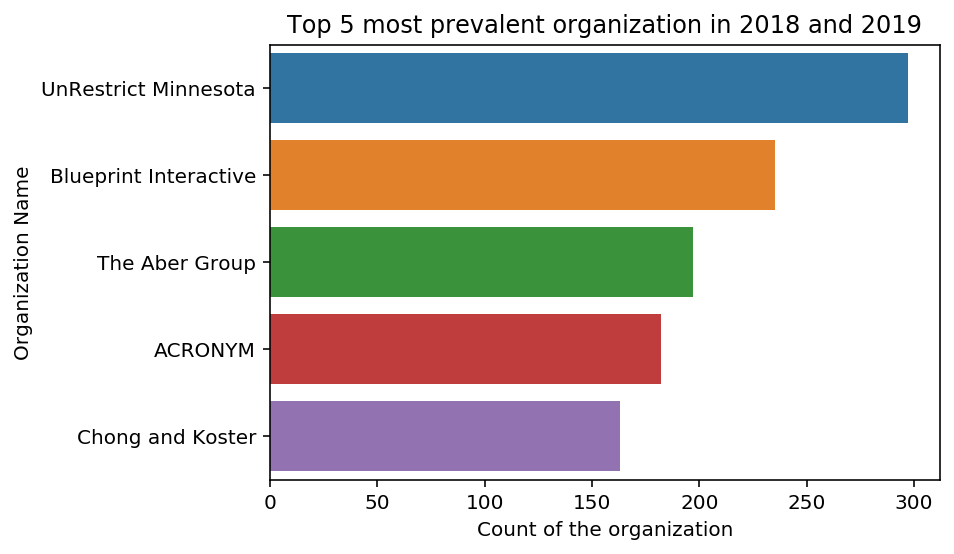

In [10]:
# find the top 5 of most prevalent organization
most_common_org = most_prevalent(ads, "OrganizationName")
sns.barplot(x = most_common_org.values, y = most_common_org.index)
plt.ylabel("Organization Name")
plt.xlabel("Count of the organization")
plt.title("Top 5 most prevalent organization in 2018 and 2019")

Text(0.5, 1.0, 'Top 5 most prevalent Advertiser in 2018 and 2019')

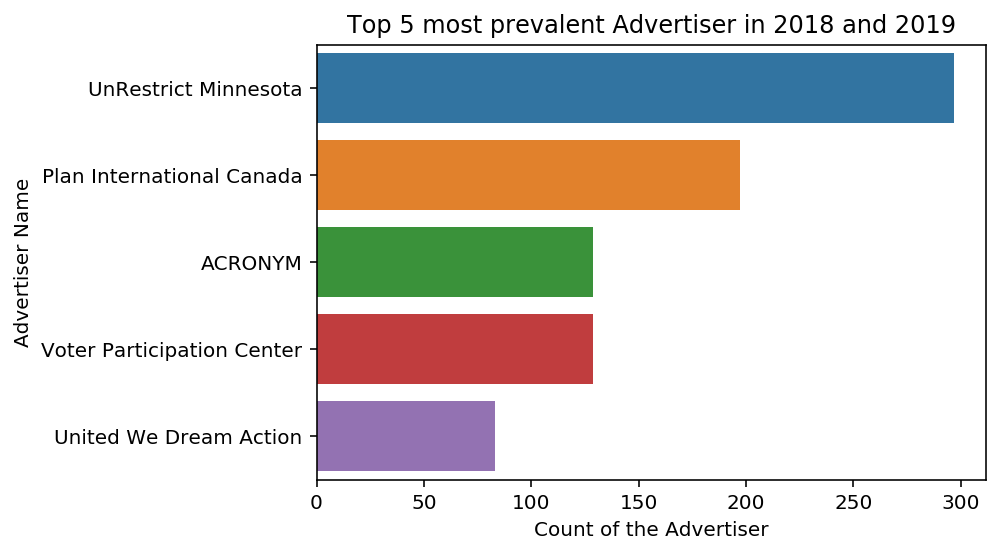

In [11]:
# find the top 5 of most prevalent paying advertiser
most_common_advertiser = most_prevalent(ads, "PayingAdvertiserName")
sns.barplot(x = most_common_advertiser.values, y = most_common_advertiser.index)
plt.ylabel("Advertiser Name")
plt.xlabel("Count of the Advertiser")
plt.title("Top 5 most prevalent Advertiser in 2018 and 2019")

### `Univariate` and `Bivariate`
#### EDA: examining the data 
Since we still don't know a lot about this dataset. Let's do some general exploration of this snapchat dataset by calculating important statistics and plotting. This section will include:
* calculating correlation
* univariate analysis through histogram and calculation of statistics

Since we are interested in finding the characteristics of high and low impressions, we can plot the correlation to see which quantitative variable has high correlation with impressions.

In [12]:
# correlation between columns 
# find out a large positive relationship between spend and impression
ads.corr()

,Spend,Impressions,LatLongRad,Targeting Connection Type,Targeting Carrier (ISP)
Spend,1.000000,0.834594,NaN,NaN,NaN
Impressions,0.834594,1.000000,NaN,NaN,NaN
LatLongRad,NaN,NaN,NaN,NaN,NaN
Targeting Connection Type,NaN,NaN,NaN,NaN,NaN
Targeting Carrier (ISP),NaN,NaN,NaN,NaN,NaN


from the correlation above, Impressions has a strong correlation with Spend.

Knowing Spend and impression have high correlation, we can plot the histogram for Impression and Spend to see the distritions and calculate some important statistics. (Univariate Analysis)

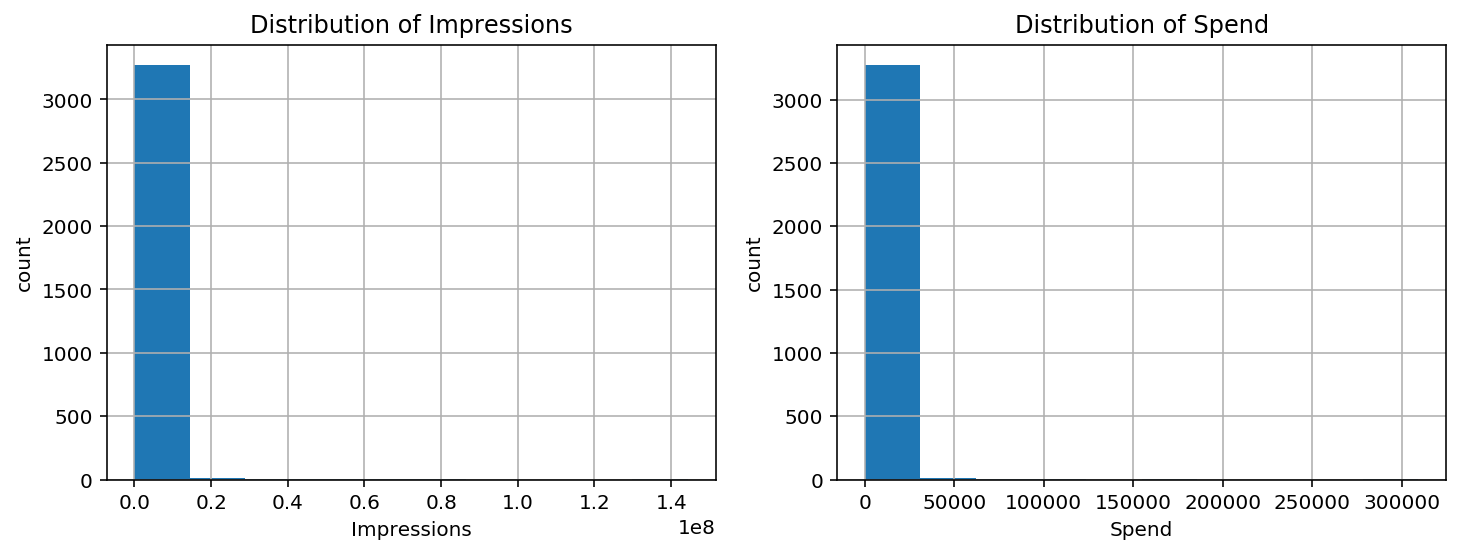

In [13]:
# univariate analysis on impressions 
plt.subplots(1,2, figsize = (12, 4))
plt.subplot(1,2,1)
ads['Impressions'].hist()
plt.title("Distribution of Impressions")
plt.xlabel("Impressions")
plt.ylabel("count")

# univariate analysis on spend
plt.subplot(1,2,2)
plt.title("Distribution of Spend")
plt.xlabel("Spend")
plt.ylabel("count")
ads['Spend'].hist()

Based on the histogram above, Impressions and Spend are very concentrated to the left. Notice that the range of x-axis is large. This is because there are actually data points in those range but the number is too few to be observed in this histogram. in addition, the data is right-skewed.

In [14]:
ads[["Spend", "Impressions"]].describe()

,Spend,Impressions
count,3289.000000,3.289000e+03
mean,1553.667680,6.671137e+05
std,9494.273048,3.855206e+06
min,0.000000,1.000000e+00
25%,41.000000,1.329400e+04
50%,186.000000,6.922800e+04
75%,797.000000,3.159950e+05
max,309348.000000,1.443530e+08


By obesrving the stats above, we notice that the mean and standard deviation for both Spend and Impressions are huge. Although most of the data are concentrated in a lower quartile, the outliers are casuing the mean and standard deviation to be large.

Knowing that Spend and Impressions have high correlation, let's plot the scatter plot to examine the relationship between these two variables.

Text(0, 0.5, 'Impressions')

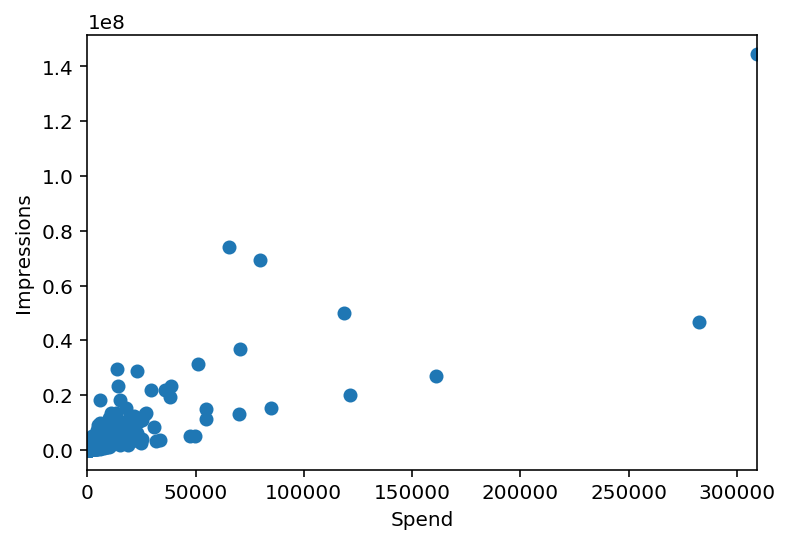

In [15]:
# bivariate analysis on impressions 
ads.plot(x='Spend', y='Impressions',style='o', legend = False)
plt.ylabel("Impressions")

We can actually see the that there is a positive correlation between Spend and Impression since when the spend goes up, the impressions also goes up. We also find out that most of the spend is under 50,000 dollars.

##### EDA: Ads with high and low impressions
Right now, we are interested in the political ads that have high and low impressions. But first, we should clarify what we mean by high reach and low reach. Since there is a strong correlation between Spend and Impression, we decide to define "reach" with Impressions divided by Spend(this value will be named efficiency). We feel that measuring the amount of views per dollar is a more appropriate measurement to define high and low reach rather than only using impressions. 

Secondly, we should also define the criteria for "low" and "high". Here, we decide to define low by any number in efficicency that is lower than 25% percentile and "high" as any number that is greater than 75% percentile. The main reason is that the mean statistic is an inaccurate midpoint since the distributions for Impression and Spend are right-skewed. Therefore, we feel that using the median is more appropriate.

In order to calculate efficiency, we first replace Spend that has 0 with 1 to avoid zero-division error. Then, we calculate and plot(kde) the efficiency.

Text(0.5, 1.0, 'KDE for dfficiency')

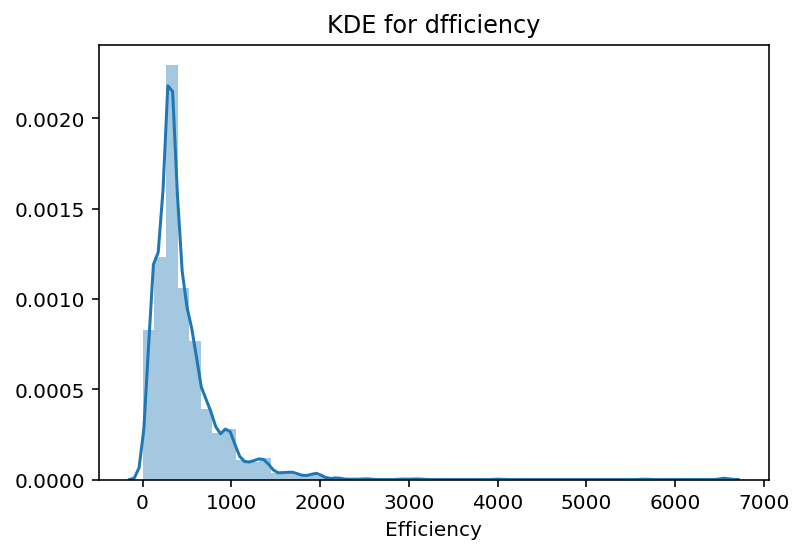

In [16]:
# there are 12 outliners that have spend == 0, replace them by 1 so that they will not affect the data
ads['Spend'] = ads['Spend'].replace(0,1)

# find out high efficient ads
# defined efficient as impression/spend
ads_eff = ads.copy()
ads_eff['Efficiency'] = ads_eff['Impressions']/ads_eff['Spend']

# plot the distribution of the efficiency (univariate for efficiency and bivariate for spend & impression)
sns.distplot(ads_eff['Efficiency'])
plt.title("KDE for dfficiency")

In [17]:
# some basic information of the new column
mean = ads_eff['Efficiency'].mean()
std = ads_eff['Efficiency'].std()
(mean,std)

(468.748894938678, 414.0453708732057)

The kde plot for kde resemble the shape of normal distribution, and the mean and standard deviation look for reasonable compared to the histograms of Impressions and Spend.

In [ ]:
The kde plot for kde resemble the shape of normal distribution, and the mean and standard deviation look for reasonable compared to the histograms of Impressions and Spend.

Now, we seperate the dataset into high efficiency and low efficiency

In [18]:
ads_stat = ads_eff.describe()["Efficiency"]
Q1 = ads_stat.loc["25%"]
Q3 = ads_stat.loc["75%"]
high_eff = ads_eff[ads_eff["Efficiency"] > Q3]
low_eff = ads_eff[ads_eff["Efficiency"] < Q1]

In [19]:
# check the number of rows that are considered as high efficiency
high_eff["Efficiency"].shape

(822,)

In [20]:
# check the number of rows that are considered as low efficiency
low_eff["Efficiency"].shape

(822,)

Text(0, 0.5, 'Density')

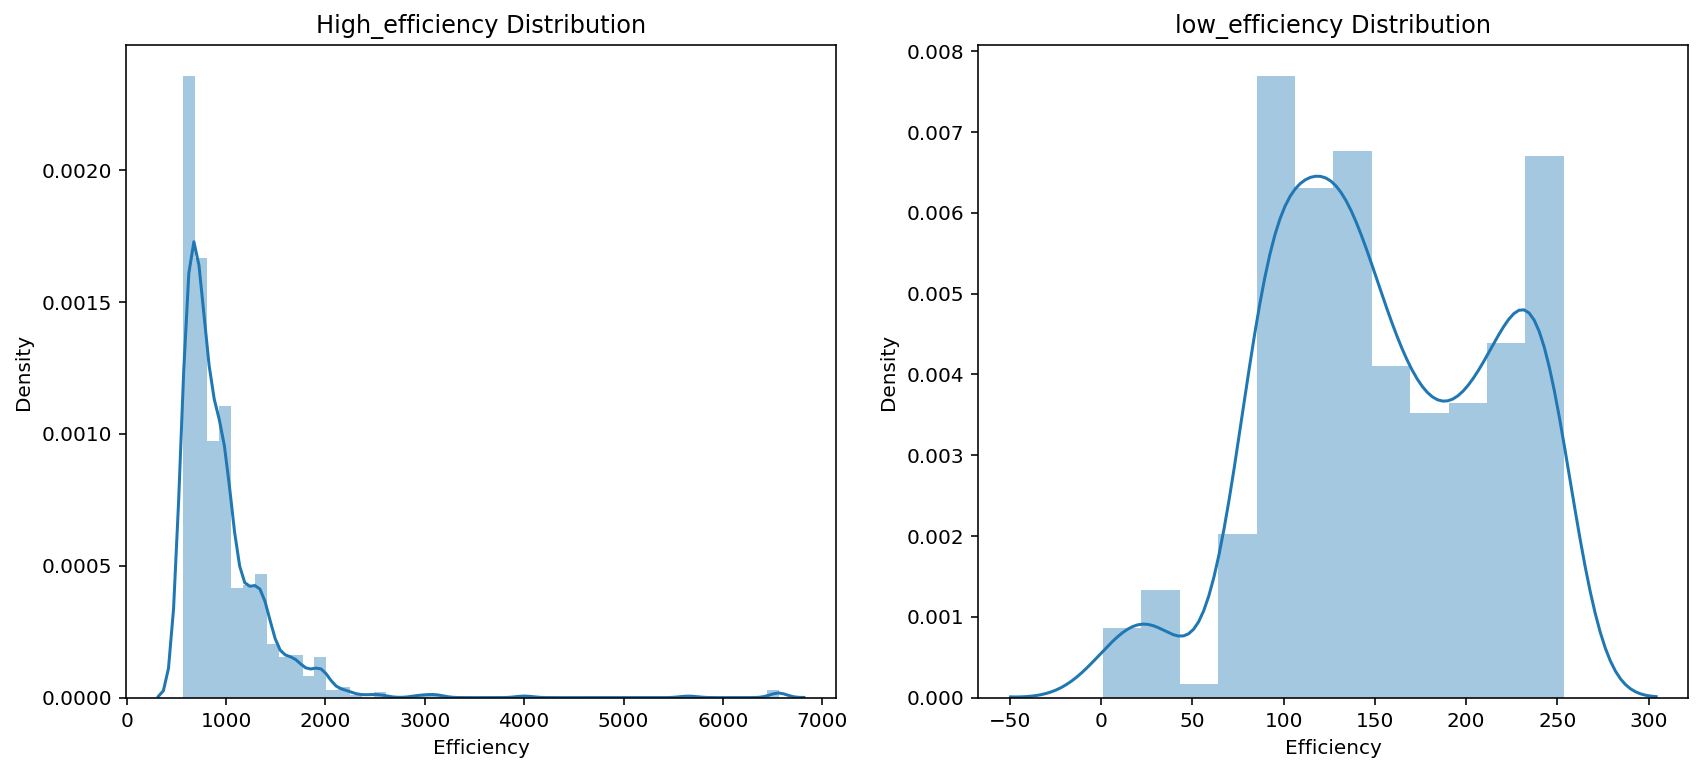

In [21]:
plt.subplots(1,2, figsize = (14, 6))
plt.subplot(1,2,1)
sns.distplot(high_eff["Efficiency"])
plt.title("High_efficiency Distribution")
plt.ylabel("Density")
plt.subplot(1,2,2)
sns.distplot(low_eff["Efficiency"])
plt.title("low_efficiency Distribution")
plt.ylabel("Density")

From the graphs above, we see that there are interesting difference between the two distributions. Perhaps this difference could be explained by the characteristics of high_efficiency and low_efficiency. We will resume back to explain this difference later in the section. (HELP!!!!)

### Assessment of Missingness

##### EDA: Finding out characteristics of low and high efficiency through nan values

we decide to calculate the difference between the proportion of null values of low and high efficiency to infer the charactersitics for both dataset. One intuition is that null values are meaningful in some columns. For instance, the null value in Gender means that the Ads is targeting both gender instead of a specific one. Therefore, taking the difference between two null proportions can give us insights on the general characteristics for high efficiency and low efficiency Ads. Even if the null value are not meaninful, the distribution of null value can still be a criteria to identify characteristics.

If the absolute difference between the two proportions are greater than or equal to 0.1, then we would say the number is meaningful enough to reveal the characteristic.

In [22]:
# difference in percentage of nans in two dataset
high_nan = (high_eff.isnull().sum())/high_eff.shape[0]
low_nan = (low_eff.isnull().sum())/low_eff.shape[0]
diff_low_high = high_nan - low_nan
diff_low_high

ADID                           0.000000
CreativeUrl                    0.000000
Spend                          0.000000
Impressions                    0.000000
StartDate                      0.000000
EndDate                       -0.041363
OrganizationName               0.000000
BillingAddress                 0.000000
CandidateBallotInformation     0.092457
PayingAdvertiserName           0.000000
Gender                        -0.043796
AgeBracket                     0.085158
CountryCode                    0.000000
RegionID                       0.085158
ElectoralDistrictID            0.015815
LatLongRad                     0.000000
MetroID                        0.034063
Interests                     -0.128954
OsType                        -0.001217
Segments                      -0.333333
LocationType                  -0.006083
Language                      -0.203163
AdvancedDemographics           0.062044
Targeting Connection Type      0.000000
Targeting Carrier (ISP)        0.000000


##### small conclusion for the difference of  null proportions 
Based on the difference between two null distribution, we can infer that: 


* Segments: The high efficienxy data has LESS null value, which may imply that high impression data usually won't employ segments criteria in Ads while low impression usually would apply such criteria.
* Language: The high efficiency data has LESS null value, which may imply that high efficiency data usually employ language criteria in Ads while low efficiency data usually would apply such criteria.
* Interests: The high efficiency dat has LESS null value, which may imply that the high impression data usually target a specific group of people while low efficiency data targets all group of people.
* CreativeProperties: The high impression data has MORE null value, which may imply that high impression data tend to NOT have a website to call for action while low efficiency data usually have the website.

##### Evaluating Missingness using Permutation test
The difference of null proportion series offer some directions to assess whether or not the missingness and non-missingness of a particular column with respect to efficiency come from different or the same distribution. Therefore, we can run a permutation test for both dataset to decide whether or not a specific column is Missing Completely At Random(MCAR), Missing At Random(MAR), or Not Missing At Random(NMAR) with respect to efficiency.
* Permutation test will be perform on Segments and CreativeProperties since the missingness in those two columns are not meaningful.

We will set the significance level to 0.05. Any p-value less than the significance level will reject the null hypothesis and vice versa.

#### Null Hypothesis: The missingness and non-missingness with respect to [a specific column] come from the SAME distribution.

#### Alternative hypothesis: The missingness and non-missingness with respect to [a specific column] come from DIFFERENT distribution.

In [23]:
# define a function for permutation test

def permutation_test(x,y,z):
    data = z[[x,y]]
    data_now = data.assign(**{y:data[y].isnull()})
    
    # diff of means
    data_ori = data.assign(**{y:data[y].isnull()}).groupby(y)[x].mean()
    truediff_mean = abs(data_ori.diff()[1])
    
    N = 1000
    answer = []

    for _ in range(N):
        # shuffle the data
        shuffled = data_now[x].sample(replace=False, frac=1).reset_index(drop=True)
        # put them in a table
        original_and_shuffled = data_now.assign(**{x: shuffled})
        # compute the group differences (test statistic!)
        ads_now = original_and_shuffled.groupby(y)[x].mean()
        diff_mean = abs(ads_now.diff()[1])
        # add it to the list of results
        answer.append(diff_mean)

    # plot the graph
    pd.Series(answer).plot(kind='hist', density=True)
    plt.scatter(truediff_mean, 0, color='red', s=40)
    
    # p val
    p_val = np.count_nonzero(truediff_mean <= answer) / N
    return "p-value: " + str(p_val)

'p-value: 0.348'

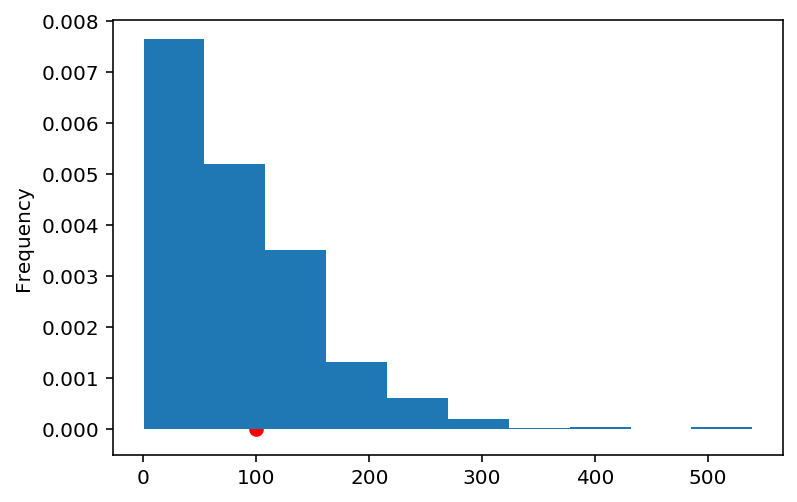

In [24]:
#efficiency vs. Segments, high efficiency data
permutation_test('Efficiency','Segments',high_eff)

Since p-value > 0.05, we failed to reject the null hypothesis.

'p-value: 0.0'

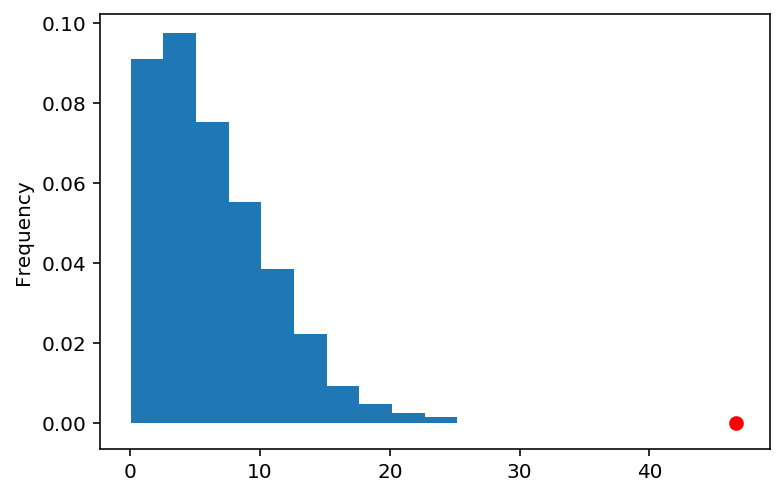

In [25]:
#efficiency vs. Segments, low efficiency data
permutation_test('Efficiency','Segments',low_eff)

Since p-value > 0.05, we failed to reject the null hypothesis.

'p-value: 0.0'

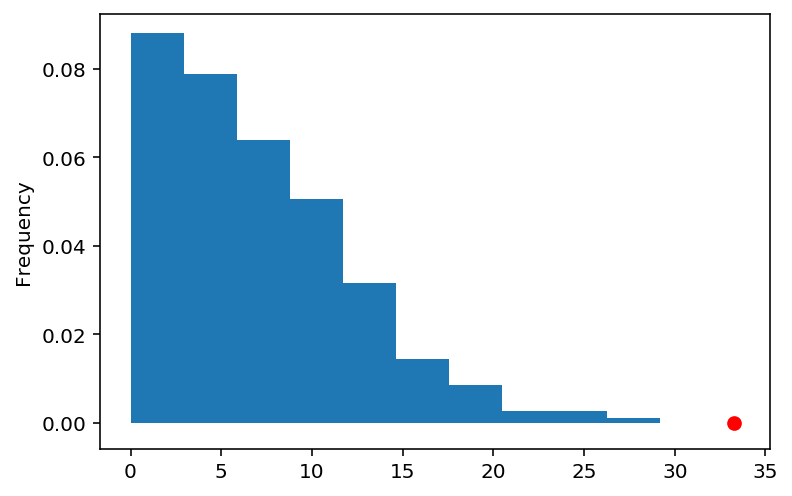

In [26]:
#efficiency vs. CreativeProperties, low efficiency data
permutation_test('Efficiency','CreativeProperties',low_eff)

Since p-value > 0.05, we reject the null hypothesis.

##### Verification for the difference of null value distributions
The permutation above only compute columns that have absolute value of the difference in null proportion column greater than 0.1. We decide to randomly choose a column that is less than 0.1. We choose to run a permutation test on EndDate, and we expect that the tests performed on two dataset would not reject the null hypothesis(i.e. non-missingness and missingness data with respect to efficiency come from the same distribution)

'p-value: 0.406'

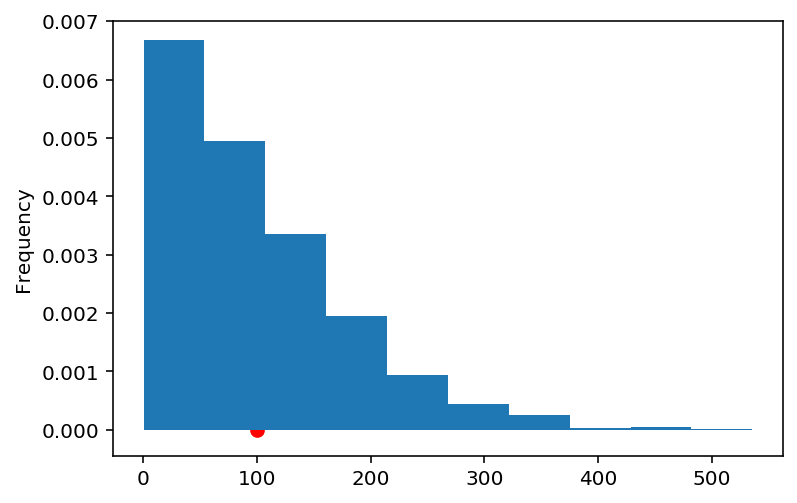

In [27]:
permutation_test('Efficiency','EndDate',high_eff)

Since p-value > 0.05, we failed to reject the null hypothesis.

'p-value: 0.062'

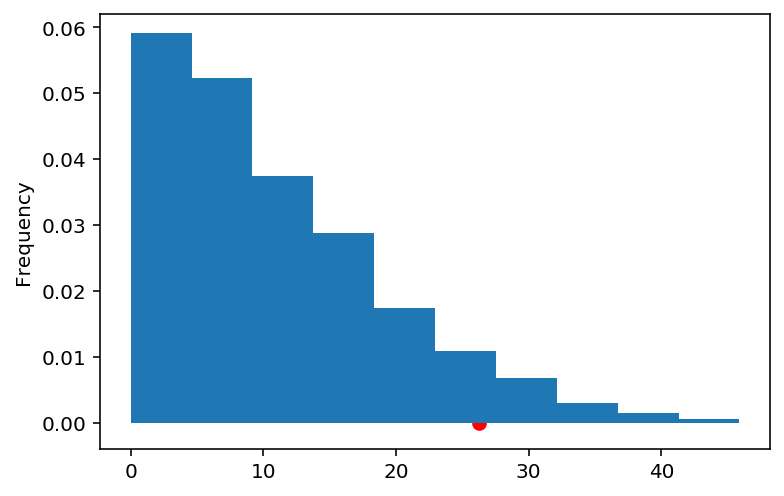

In [28]:
permutation_test('Efficiency','EndDate',low_eff)

Since p-value > 0.05, we failed to reject the null hypothesis.

##### Small conclusion for  permutation test

High efficiency:
* The missingness and non-missingness in Segments, CreativeProperties, and EndDate with respect to efficiency come from the same distribution. 


Low efficiency:
* The missingness and non-missingness in Segments and CreativeProperties with respect to efficiency come from different distribution.
* The missingness and non-missingness in EndDate with respect to efficiency come from the same distribution.

We can conclude that the Missingness in Segments, CreativeProperties, and EndDate are Missing Completely At Random(MCAR) with respect to efficiency in high efficiency data. But for other permutation tests, we cannot ensure if the missingness is `Missing At Random (MAR)` or `Not Missing At Random (NMAR)`.

On the one hand, take 'Segments' in 'Low Efficiency' dataset as an example. It might be `NMAR` because for those advertisements whic have low efficiency might be provided by small advertising companies. As small company, the advertisor does not want to provide clues that help their competitors to beat them since that might lead to the bankrupt of their company. Since if they provide their segments of audiences, there might be a risk that those files will be reveal. Thus, although they might do some segements on audiences, they will prefer not to mention those segements when giving the advertisement to snapchat. 

On the other hand, Segments and CreativeProperties are MAR in low efficiency dataset because Ads with low efficiency generally wants to recruit more audiences in order to increase their efficiency.

### Hypothesis test

By looking into the 'Readme.txt', we find out that some of the NaN values have some special meanings. We choose 'Language' and 'Interests' column for future analysis since they share a common characteristic that the NaN in their column means target to the general public.
We decide to start a hypothesis testing on these columns to find out will a specific target benefit to higher efficiency. 

#### Null Hypothesis: Specific target will not affect the efficiency
#### Alt Hypothesis: Specific target will lead to higher efficiency


In [29]:
# first do some exploration in Language column
ads_eff['Language'].value_counts()

en       573
fr        96
nb        62
nl        45
da        33
en,es     23
de        22
es        14
ar        11
nb,en      6
nl,en      5
sv         4
fi         4
ar,en      3
de,en      2
en,de      1
es,en      1
Name: Language, dtype: int64

We modify the 'Language' column so that it can be easily calculate when we do permutation test

In [30]:
# assign True if the language have a specific target, else assign False
func = lambda x: False if pd.isnull(x) else True
ads_lan = ads_eff.assign(Language = ads_eff['Language'].apply(func))

# check the value counts
ads_lan['Language'].value_counts()

False    2384
True      905
Name: Language, dtype: int64

Then we start the new permutation test on the 'Language' column. (Basically same test as the missingness permutation test)

0.0

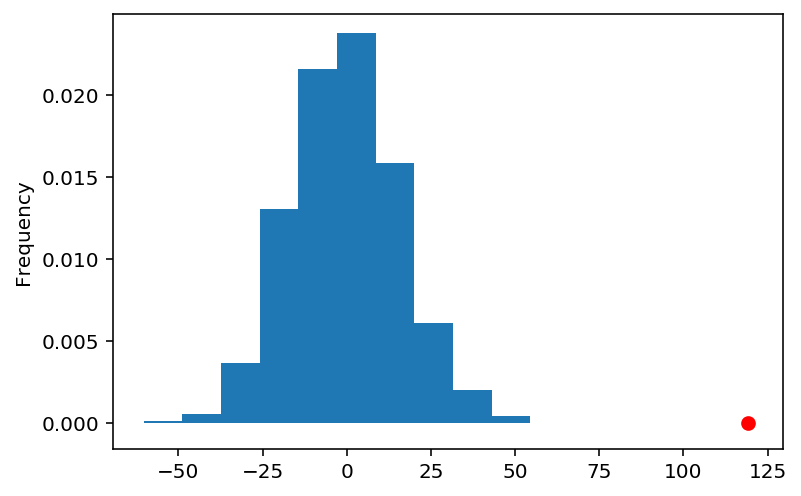

In [31]:
# permutation tests of diff mean
data = ads_lan[['Efficiency','Language']]

# diff of means in original dataset
data_ori = data.groupby('Language')['Efficiency'].mean()
truediff_mean = data_ori.diff()[1]

N = 1000
answer = []

for _ in range(N):
    # shuffle the data
    shuffled = data['Efficiency'].sample(replace=False, frac=1).reset_index(drop=True)
    # put them in a table
    original_and_shuffled = data.assign(**{'Efficiency': shuffled})
    # compute the group differences (test statistic!)
    ads_now = original_and_shuffled.groupby('Language')['Efficiency'].mean()
    diff_mean = ads_now.diff().sum()
    # add it to the list of results
    answer.append(diff_mean)
    
# plot the graph
pd.Series(answer).plot(kind='hist', density=True)
plt.scatter(truediff_mean, 0, color='red', s=40)

# p val
p_val = np.count_nonzero(truediff_mean <= answer) / N
p_val

We get a conclusion that the specific target of language will lead to a higher efficiency since we reject the null hypothesis with p-val equal to 0.0. 
To further verify that our conclusion is correct, we plot the distribution of two groups and also use ks-statistic permutation test

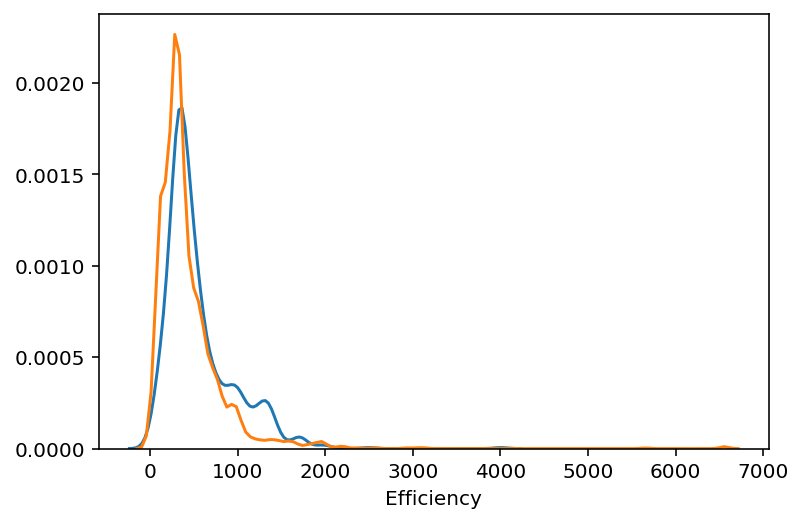

In [32]:
# plot the data of two different groups (Having target vs. No target)
working = ads_lan.copy()[["Efficiency", 'Language']]
True_cond = working.loc[working["Language"] == True, "Efficiency"]
False_cond = working.loc[working["Language"] == False, "Efficiency"]
sns.distplot(True_cond, hist = False)
sns.distplot(False_cond, hist = False)

The distribution looks different in distribution

0.0

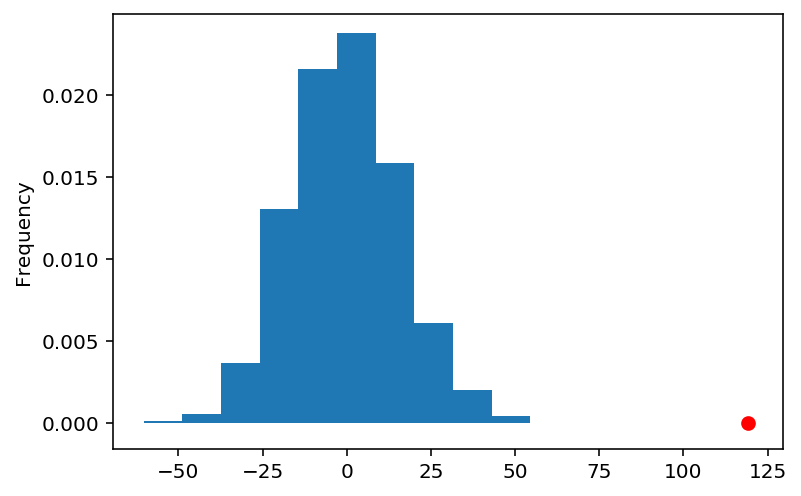

In [33]:
# permutation test using ks-statistic
from scipy.stats import ks_2samp

N = 1000
data = ads_lan[['Efficiency','Language']]

grps = data.groupby('Language')['Efficiency']
origin = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
ks_list = []

for _ in range(N):
    # shuffle the efficiency
    shuffle_data = data['Efficiency'].sample(frac=1,replace=False).reset_index(drop=True)
    # put them in a table
    original_and_shuffled = data.assign(**{'Efficiency': shuffle_data})
    # group by language
    grps = original_and_shuffled.groupby('Language')['Efficiency']
    # calculate the ks-statistic
    ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    # add it into answer list
    ks_list.append(ks)
    
# plot the graph
pd.Series(answer).plot(kind='hist', density=True)
plt.scatter(truediff_mean, 0, color='red', s=40)

# p val
p_val = np.count_nonzero(truediff_mean <= answer) / N
p_val

By using ks-statistic, we still get the same conclusion that having the specific target in language will lead to a higher efficiency by rejecting the null hypothesis with a p-val equals to 0.0

We repeat the same progress on column 'Interests'

In [34]:
# first do some exploration in Interests column
ads_eff['Interests'].value_counts()

Green Living Enthusiasts,Hipsters & Trendsetters,Political News Watchers,Wellness & Healthy Lifestyle,Eco-Conscious Shoppers,TV Network Viewers (BBC America),TV Network Viewers (CNN),TV Network Viewers (Comedy Central),TV Network Viewers (MSNBC)                95
Political News Watchers                                                                                                                                                                                                                                              29
Advocates & Activists                                                                                                                                                                                                                                                28
Soccer Enthusiasts                                                                                                                                                                                              

In [35]:
# assign True if the Interests have specific target, else assign False
func = lambda x: False if pd.isnull(x) else True
ads_in = ads_eff.assign(Interests = ads_eff['Interests'].apply(func))
ads_in['Interests'].value_counts()

False    2508
True      781
Name: Interests, dtype: int64

0.0

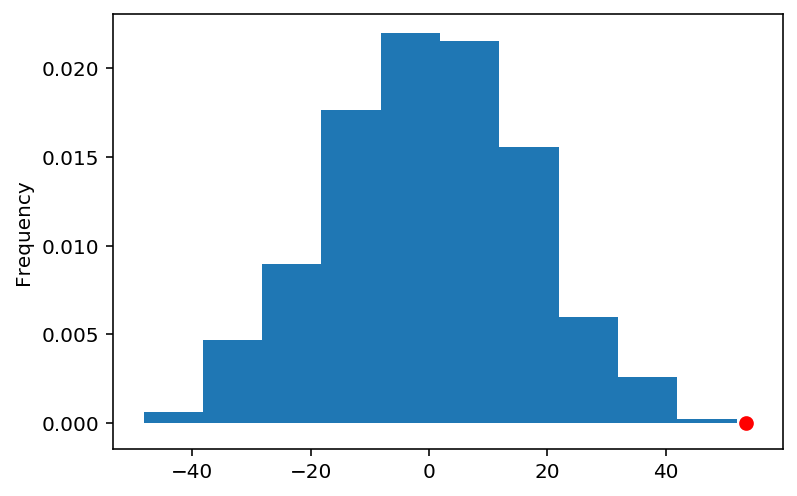

In [36]:
# permutation tests of diff mean
# define a function for permutation test
data = ads_in[['Efficiency','Interests']]

# diff of means
data_ori = data.groupby('Interests')['Efficiency'].mean()
truediff_mean = data_ori.diff()[1]

N = 1000
answer = []

for _ in range(N):
    # shuffle the data
    shuffled = data['Efficiency'].sample(replace=False, frac=1).reset_index(drop=True)
    # put them in a table
    original_and_shuffled = data.assign(**{'Efficiency': shuffled})
    # compute the group differences (test statistic!)
    ads_now = original_and_shuffled.groupby('Interests')['Efficiency'].mean()
    diff_mean = ads_now.diff().sum()
    # add it to the list of results
    answer.append(diff_mean)
    
# plot the graph
pd.Series(answer).plot(kind='hist', density=True)
plt.scatter(truediff_mean, 0, color='red', s=40)

# p val
p_val = np.count_nonzero(truediff_mean <= answer) / N
p_val

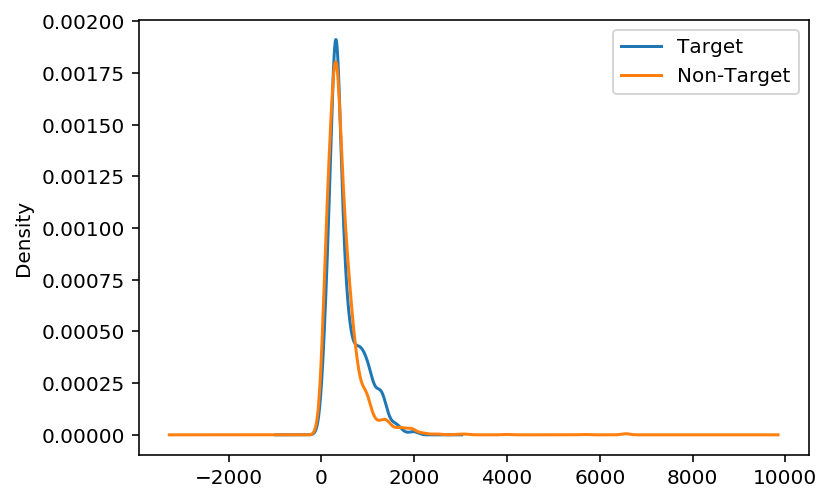

In [37]:
working = ads_in.copy()[["Efficiency", 'Interests']]
True_cond1 = working.loc[working["Interests"] == True, "Efficiency"]
False_cond1 = working.loc[working["Interests"] == False, "Efficiency"]
True_cond1.plot.kde()
False_cond1.plot.kde()
plt.legend(["Target", "Non-Target"])

0.11080598423074331

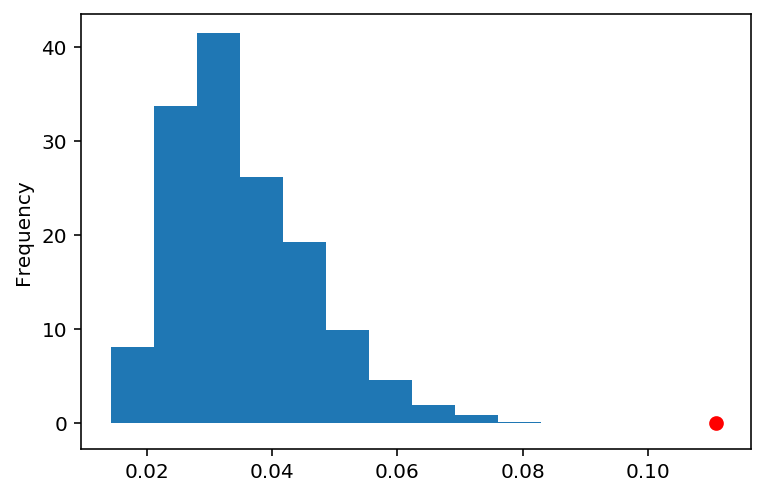

In [47]:
# permutation test using ks-statistic
from scipy.stats import ks_2samp

N = 1000
data = ads_in[['Efficiency','Interests']]

grps = data.groupby('Interests')['Efficiency']
origin = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
ks_list = []

for _ in range(N):
    # shuffle the efficiency
    shuffle_data = data['Efficiency'].sample(frac=1,replace=False).reset_index(drop=True)
    # put them in a table
    original_and_shuffled = data.assign(**{'Efficiency': shuffle_data})
    # group by the interest column
    grps = original_and_shuffled.groupby('Interests')['Efficiency']
    # calculate the ks-statistics
    ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    # add it to the list of results
    ks_list.append(ks)

# plot the graph
pd.Series(ks_list).plot(kind='hist', density=True)
plt.scatter(origin, 0, color='red', s=40)

# p val
p_val = len([i for i in ks_list if i >= origin])  / N
origin

In [40]:
func = lambda x: 10 if pd.isnull(x) else x[:2]
age = ads['AgeBracket'].apply(func)
age

0       18
1       18
2       18
3       18
4       10
        ..
3284    18
3285    21
3286    18
3287    18
3288    18
Name: AgeBracket, Length: 3289, dtype: object

##### Small conclusion for  hypothesis test

- Null Hypothesis: Specific target will not affect the efficiency
- Alt Hypothesis: Specific target will lead to higher efficiency
- Test statistics: difference of efficiency mean & ks-statistics

By using the hypothesis test for both `Language` and `Interests` column, we reject the null hypothesis in both tests and these lead us to our alt hypothesis. we gain an understanding that the specific target will lead to higher efficiency. 

The reason for why we get this answer will have multiple explanation. For `Language` column, since the advertisor will use words in their advertisements, if the reader cannot understand the language, they will not leave any impression about the advertisements. Thus, the specific target of language will provide the correct direction of who, as viewers, will see this advertisements and ensure that they can understand what is the content in the advertisement. For `Interests` column, since some of the people might be interesting in a specific political area, they might pay more attention when they see advertisements related to the area. However, for those who are not interested in political at all, they will skip the advertisements and then they will have no impression about them.

Thus, for future advertisors, it might be a wise choice to find out the target viewers and assign those specific groups when design and post the advertisement, it might be helpful to reduce the cost but gain more impressions


# Summary of Findings


### Introduction
We define a new variable `Efficiency` and use `classification` to predict if the advertisment will have high efficiency or low efficiency. We use `accuracy` to compare the models we formed and also check the `f1-score` in fairness part. Since the duration of the advertisments might be an important feature of prediction, we also subtract the EndDate column by StartDate column to form a new feature called `durtion of ads(days)`. In final model, we try to clean the AgeBracket column and form two new features called `low_age` and `high_age`, which represent the lower and upper bond of the AgeBracket column.

#### Leading question: How can we use other variables to `predict the efficiency` of the advertisment.
#### Predict problem: `Classification`
#### Evaluation matric: `accuracy` (comparing models) and `f1-score` (in fairness part)
#### New features: `Duration of ads (days)`, `low_age`, `high_age`, and `Efficiency`

### Baseline Model
We decide to use Support Vector Machine(SVM) as our model. The reason is that we felt the SVM is more generalizable to the unseen data. The theory behind SVM is that it constructs a hyper-plane to seperate the labels in a high dimension space. We did a simple processing of the data. First, we seperate the categorical data and the numerical data. For categorical columns, we place the nan value with the string "NULL", and we simply one-hot encode each data. For numerical columns, we fill any nan value with 0. Then, we construct a pipeline that first pre-process the data and then feed into the SVM model. We evaluate the model based on the accuracy score. We know that the accuracy is not the best evaluation to judge the efficiency of the model, but if the accuracy is low at the first hand, the model itself will not perform well on the unseen data. We got the accuracy on the test-set around 61%, which is not a good model.

### Final Model

#### Cleaning data and form calculable variables
In the final model, we first clean the data and do some exploration. We separate the columns into `top 5` and `1/0` two categories. We also redefine the AgeBracket column and separate into two columns, `low_age` and `high_age`

`top 5`: some columns have a huge various in the value. However, the top 5 values may take upto 1/3 of the rows. Thus, those 5 values will be considered as important variables. We decide that, for those columns, we assign other values into one category 'Null' and remain the top 5 values untouched. In this way, we can use one hot encoder on those columns.

`1/0`: some columns contain a lot of np.nan. From project 3's write-up, we know that the nan values meaning no specific target. Since the value_counts shows that the variables may have really small number, we decide to represent np.nan with 0, which means 'No Specific Target'. For the remaining values, we represent by 1 which means 'Have Specific Target'.

`AgeBracket`: AgeBracket is an interesting column, it contains a lot of different format like '18', '18+', '18-45', and '36-'. Then we defined two new columns - `low_age` and `high_age`.  By cleaning the data, we get the lower bond of the age bracket (`low_age` column) and upper bond of the age bracket (`high_age` column)

#### First Model
We then start explore our first model. We put all the top 5 columns into OneHotEncoder. Since the duration column have a huge variance, we decide to standarlize the duration column. We passthrough other columns. However, we get an `accuracy` around `0.5`, which does not shows that our model improve from the baseline model.

#### Final Model
Recall in Lab09, when we do the prediction of the titanic dataset, the fucntion StdScalerByGroup help us improve a lot in the accuracy. We decide to use the same function we wrote in Lab09. Since we should have a column represent as group, we remodify the `low_age` and `high_age`. We separate them into 4 groups for each column (from 1 to 4). 

The model we have for the final model is that we still put all top 5 columns into OneHotEncoder and duration column in Standard Scaler. We then combine (low_age and high_age) with (spend and impressions) and put them into StdScalerByGroup. The remain columns will be all 1/0 type columns, thus we just pass them through. 

For the final model, we see a huge improve in accuracy, which achive `0.7`

#### Grid Search
Since we are using SVM as our model, it contains a lot of parameters. In lecture, professor mentioned a method called GridSearch which can automatically run different models and return the best parameters. Thus, we use the GridSearch and find out the parameter for our model will be `{'C': 14, 'gamma': 'auto', 'kernel': 'linear', 'probability': True}`, which have an accuracy around `0.79`. It is a huge improve from our first model.

### Fairness Evaluation
After obtaining the Final model, we decide to further evaluate the model's efficiency. We calculated the True Positive(TP), False Positive(FP), True Negative(TP), and False Negative(FN) values. Then, based on these values, we calculated the recall, specificity, precision, F1-score, and False Discovery Rate(FDR). In addition, we also try to find out the pattern of distributions for TP, FP, TP, and FN with respect to Spend and Impression through scatter plot and distribution plot. Lastly, we do a permutation test with recall as our test statistics. We want to find out whether or not the recall score of different category in a selected data come from the SAME distribution or DIFFERENT distribution. By doing this, we are able to know whether or not our model is specifically biased toward a particular category or group of people.

In [42]:
# import everything we need in the project

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Import data
We first import data from 2018 and 2019 dataset and join the data together.

In [45]:
# import the advertisement file of 2018
fp_2018 = os.path.join('data', 'PoliticalAds_2018.csv')
ads_2018 = pd.read_csv(fp_2018)

# import the advertisement file of 2019
fp_2019 = os.path.join('data', 'PoliticalAds_2019.csv')
ads_2019 = pd.read_csv(fp_2019)

# merge two table together and reset the index
ads = pd.concat([ads_2018,ads_2019]).reset_index()

### Cleaning Data / Manipulating Data
* convert the time columns into date-time object. Then, we calculate the time difference measured in days by subracting EndDate and StartDate. We replace the nan value by the median of time difference, since the distribution of the time difference is right-skewed and the mean is susceptable to outliers.
* create a new property called 'Efficiency' that measures how much impressions will achieve in an unit number of spend. By making this variable, we can predict the efficiency using other columns and might give advertisors a general idea when they decide to create a new political advertisement.
* Then, we convert Efficiency into binary representation. 1 means ads with high efficiency and 0 mean ads with low efficiency. The boundary we choose to seperate high and low is through median(from original efficiency value). The reason is that it ensures we have equally amount of high efficiency and low efficiency data.
* Drop the unnecessary columns, such as index, ADID, BillingAddress, and CreativeURL.


In [48]:
# convert the start date and end date columns into datetime format
ads['StartDate'] = pd.to_datetime(ads['StartDate'])
ads['EndDate'] = pd.to_datetime(ads['EndDate'])
ads.dtypes.loc[["StartDate", "EndDate"]]

StartDate    datetime64[ns, UTC]
EndDate      datetime64[ns, UTC]
dtype: object

In [49]:
# drop the index column
ads = ads.drop('index', axis = 1)

# notice that the spend column have 0 value, replace by 1 for future use
ads_eff = ads.copy()
ads_eff['Spend'] = ads_eff['Spend'].replace(0,1)
ads_eff.head()

,ADID,CreativeUrl,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,...,Interests,OsType,Segments,LocationType,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),Targeting Geo - Postal Code,CreativeProperties
0,68189125240c16e3dcec398a7b4e040e74621ccf11df25...,https://www.snap.com/political-ads/asset/b2d0c...,2,1301,2018-08-22 15:00:40+00:00,2018-09-09 12:30:23+00:00,Context Media,"Västra Norrlandsgatan 7 ,UMEÅ,90327,SE",NaN,Socialdemokraterna - Kalmar Län,...,NaN,NaN,Provided by Advertiser,NaN,sv,NaN,NaN,NaN,NaN,web_view_url:http://www.socialdemokraterna.nu/...
1,3542d40ba9fb0f0aa52889b03ea4a7db64ee4a3687aa6e...,https://www.snap.com/political-ads/asset/bc5a0...,143,49094,2018-09-12 10:01:00+00:00,2018-09-15 17:59:00+00:00,Congressman Pete King,US,NaN,Pete King for Congress,...,"Political News Watchers,ZZ_Deprecated_1",NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,"11701,11702,11706,11705,11714,11715,11716,1171...",web_view_url:http://peteking.com/2018campaignf...
2,6d1eb1af8c01a43def7b695fd19f2c43fa6625d126a063...,https://www.snap.com/political-ads/asset/d9367...,1913,886571,2018-10-21 22:19:57+00:00,2018-11-05 23:17:28+00:00,Ohio Democratic Party,US,NaN,The Ohio Democratic Party,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"44313,44306,44325,44601,44805,44004,45701,4412...",web_view_url:https://IWillVote.com/OH
3,64d906646b616c034c91b69b9e7851944844eb456dd203...,https://www.snap.com/political-ads/asset/e56c0...,56,11770,2018-09-28 23:10:14+00:00,2018-10-17 02:00:00+00:00,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,Voter Participation Center,...,NaN,NaN,Provided by Advertiser,NaN,NaN,Marital Status (Single),NaN,NaN,NaN,web_view_url:https://www.voterparticipation.or...
4,4a090b72334ceabe7779ffe261a518b6f182e3fde4337e...,https://www.snap.com/political-ads/asset/8a8cb...,255,142929,2018-12-15 15:12:18+00:00,2018-12-21 15:11:41+00:00,Luton Borough Council,"36 Golden Square,London,w1f 9jx,GB",NaN,BSBT,...,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://vimeo.com/305748063


In [51]:
# continue our exploration of project 3, create a new column name 'efficiency'
# efficiency = impression / spend
ads_eff['Efficiency'] = ads_eff['Impressions'] / ads_eff['Spend']

# choose the median of the efficiency column, which will separate the efficiency into two categories
ads_stat = ads_eff.describe()["Efficiency"]
half = ads_stat.loc["50%"]

# assign 1 means the efficiency is higher than the median, which is considered as high efficiency
# assign 0 means the efficiency is lower than the median, which is considered as low efficiency
ads_eff = ads_eff.assign(Efficiency = ads_eff["Efficiency"].apply(lambda x: 1 if x >= half else 0))

In [52]:
#drop ADID, Billing Address, CreativeUrl since they are not meaningful properties
ads_eff = ads_eff.drop(["ADID", "BillingAddress", "CreativeUrl"], axis = 1)

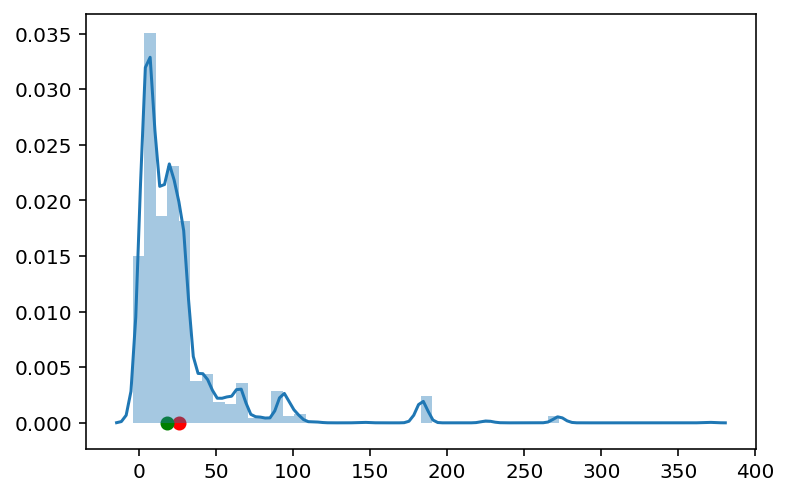

In [53]:
# first explore the duration of the advertisment
time_difference = (ads_eff["EndDate"] - ads_eff["StartDate"]).apply(lambda x: x.total_seconds() / (3600 * 24))

ignore_nan = time_difference.dropna()
sns.distplot(ignore_nan)
plt.scatter(time_difference.mean(),0, color = "red")
plt.scatter(time_difference.median(), 0, color = "green")
#since data right-skewed, convert nan to median

In [54]:
# assign new column to ads table, fill the nan value by the median. Time_difference is our new feature
time_difference = time_difference.fillna(time_difference.median())
ads_eff = ads_eff.assign(**{"duration of ads(days)":time_difference}).drop(["StartDate", "EndDate"], axis = 1)

In [55]:
ads_eff["LatLongRad"].unique()

array([nan])

### Baseline Model
We use SVM as our baseline model and we separate the columns into 'object' and 'number' categories. 

#### object category
We first use `simpleimputer` to replace nan value to the string "NULL". Then, we use `onehotencoder` to one-hot the features.

#### number category
We use `simpleimputer` to replace nan value with 0. The reason we do this is that we noticed that some numeric data is actually categorical and there are nan values throughout the column. Therefore, we thought it's a valid approach to just replace those values with 0.

#### Pipeline
* we use pipeline for data-preprocessing, and then we use a column transformer to connect all of the preprocessed data. Finally, we make another pipeline that feed in the processed data into the model for training. We obtained a accuracy score of roughly 61% in our test-set for our base-line model.

In [56]:
# separate the features and target
features = ads_eff.drop("Efficiency", axis = 1)
target = ads_eff["Efficiency"]

In [57]:
features.columns

Index(['Spend', 'Impressions', 'OrganizationName',
       'CandidateBallotInformation', 'PayingAdvertiserName', 'Gender',
       'AgeBracket', 'CountryCode', 'RegionID', 'ElectoralDistrictID',
       'LatLongRad', 'MetroID', 'Interests', 'OsType', 'Segments',
       'LocationType', 'Language', 'AdvancedDemographics',
       'Targeting Connection Type', 'Targeting Carrier (ISP)',
       'Targeting Geo - Postal Code', 'CreativeProperties',
       'duration of ads(days)'],
      dtype='object')

In [58]:
# baseline model
types = ads_eff.drop("Efficiency", axis = 1).dtypes
catcols = types.loc[types == np.object].index
numcols = types.loc[types != np.object].index
cats = Pipeline(steps = [("imp", SimpleImputer(strategy = "constant", fill_value = "NULL")),
                        ("ohe", OneHotEncoder(handle_unknown = "ignore", sparse = False))])
                
ct = ColumnTransformer(transformers = [('catcols', cats, catcols),
                                       ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)])

p1_svm = Pipeline(steps = [('features', ct), ('svm', SVC(gamma='auto'))])

In [59]:
# separate the train and test set
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [60]:
p1_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('features',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('catcols',
                                                  Pipeline(memory=None,
                                                           steps=[('imp',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='NULL',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                             

In [61]:
# baseline model score
svm_score = p1_svm.score(X_test, y_test)
svm_score

0.6148238153098421

## Final Model

### Clean data and assign features
We check the unique values contain in each column and find out the best way to make the feature useful. By exploring the data, we decide to transform data by two different method - `top 5` and `1/0`

#### Top 5
We find out that for some columns, when using value_counts method, there will have five values that is significant higher than other values and also take a large part of the data. Thus, we decide to remain that 5 values unchanged and also create a new 'null' group that contains all other different values. 
In this way, the column will have 6 unique values and can use `onehotencoder` to predict the efficiency

#### 1/0
We find out that for some columns, there will be part of the column that have specific value but mainly np.nan value. Thus, for those column, we assign 1 to those who have specific value and other 0.
In this way, the column will have two different categories (1 and 0) and can use them to predict the efficiency.

In [62]:
working = ads_eff.copy()

In [63]:
# example of top 5. We will only select the top five data, and categorize the rest as the same type.
working['OrganizationName'].value_counts()

UnRestrict Minnesota         297
Blueprint Interactive        235
The Aber Group               197
ACRONYM                      182
Chong and Koster             163
                            ... 
Liberals 4 Love, LLC           1
STG                            1
Murtaugh for Congress          1
Greenpeace Fund, Inc.          1
Norsk Studentorganisasjon      1
Name: OrganizationName, Length: 330, dtype: int64

As we can see for the OrganizationName column, more than 1000 columns have top 5 values. However, there has 330 unique values with a lot only appear one time. By using the top 5 stategy, we separate the values into 6 categories, which will create better prediction

In [64]:
# example of 1/0
working['Gender'].value_counts()

FEMALE    250
MALE       72
Name: Gender, dtype: int64

In [65]:
working['Gender'].isnull().sum()

2967

As we can see for the Gender column, there are about 320 rows that contains value, which is 'Female' or 'Male'. And for the reset 3000 columns, the value of Gender is np.nan. As we learned in the project 3 write-up, the np.nan of Gender column means no specific target. Thus, we can separate the Gender column into to categories. One is have specific target (represent by value 1) and the other is without a specific target (represent by value 0).

In [66]:
# By doing some exploration on the columns, we separate the useful columns into two group and also drop the useless
# columns which might do not provide much information.

top_5_col = ["OrganizationName", "CandidateBallotInformation", "PayingAdvertiserName", "CountryCode",
            "CountryCode", "RegionID", "Language"]

one_and_zero = ["Gender", "ElectoralDistrictID", "MetroID", "Interests", "OsType", 
               "Segments", "LocationType", "AdvancedDemographics", 
                "Targeting Geo - Postal Code", "CreativeProperties"]

working = working.drop(['LatLongRad','Targeting Connection Type','Targeting Carrier (ISP)'],axis=1)

In [67]:
# We define the function for top 5 transformation
def top_5(a_series):
    not_top_5 = a_series.value_counts().iloc[:6].index
    not_top_5_series = a_series.loc[~(a_series.isin(not_top_5))].index
    null_val = pd.Series("Null", index = not_top_5_series)
    a_series.loc[~(a_series.isin(not_top_5))] = null_val
    return a_series

In [68]:
# and apply the change
working[top_5_col] = working[top_5_col].apply(top_5)

working.head()

,Spend,Impressions,OrganizationName,CandidateBallotInformation,PayingAdvertiserName,Gender,AgeBracket,CountryCode,RegionID,ElectoralDistrictID,...,Interests,OsType,Segments,LocationType,Language,AdvancedDemographics,Targeting Geo - Postal Code,CreativeProperties,Efficiency,duration of ads(days)
0,2,1301,Null,Null,Null,NaN,18-24,Null,Null,NaN,...,NaN,NaN,Provided by Advertiser,NaN,Null,NaN,NaN,web_view_url:http://www.socialdemokraterna.nu/...,1,17.895637
1,143,49094,Null,Null,Null,NaN,18+,united states,Null,NaN,...,"Political News Watchers,ZZ_Deprecated_1",NaN,Provided by Advertiser,NaN,Null,NaN,"11701,11702,11706,11705,11714,11715,11716,1171...",web_view_url:http://peteking.com/2018campaignf...,0,3.331944
2,1913,886571,Null,Null,Null,NaN,18-23,united states,Null,NaN,...,NaN,NaN,NaN,NaN,Null,NaN,"44313,44306,44325,44601,44805,44004,45701,4412...",web_view_url:https://IWillVote.com/OH,1,15.039942
3,56,11770,Chong and Koster,Null,Voter Participation Center,FEMALE,18+,united states,Minnesota,NaN,...,NaN,NaN,Provided by Advertiser,NaN,Null,Marital Status (Single),NaN,web_view_url:https://www.voterparticipation.or...,0,18.117894
4,255,142929,Null,Null,Null,NaN,NaN,united kingdom,Null,NaN,...,NaN,NaN,Provided by Advertiser,NaN,Null,NaN,NaN,web_view_url:https://vimeo.com/305748063,1,5.999572


In [69]:
# We also code the change for 1/0 transformation and apply the change
func = lambda x: 0 if pd.isnull(x) else 1
columns = one_and_zero
for col in columns:
    working[col] = working[col].apply(func)

In [70]:
working.head()

,Spend,Impressions,OrganizationName,CandidateBallotInformation,PayingAdvertiserName,Gender,AgeBracket,CountryCode,RegionID,ElectoralDistrictID,...,Interests,OsType,Segments,LocationType,Language,AdvancedDemographics,Targeting Geo - Postal Code,CreativeProperties,Efficiency,duration of ads(days)
0,2,1301,Null,Null,Null,0,18-24,Null,Null,0,...,0,0,1,0,Null,0,0,1,1,17.895637
1,143,49094,Null,Null,Null,0,18+,united states,Null,0,...,1,0,1,0,Null,0,1,1,0,3.331944
2,1913,886571,Null,Null,Null,0,18-23,united states,Null,0,...,0,0,0,0,Null,0,1,1,1,15.039942
3,56,11770,Chong and Koster,Null,Voter Participation Center,1,18+,united states,Minnesota,0,...,0,0,1,0,Null,1,0,1,0,18.117894
4,255,142929,Null,Null,Null,0,NaN,united kingdom,Null,0,...,0,0,1,0,Null,0,0,1,1,5.999572


#### Another new features
For the AgeBracket column, we find out that it gives value in different format like '18+' or '18-50'. Since the age target maybe an important variable for prediction, we decide to develop two new variable columns named `low_age` and `high_age`. For `low_age` column, it contains the lower bond of the age bracket. And for `high_age`, it contains the upper bond of the age bracket. 
Since for some rows, the age bracket means targetting all age, we decide to define a common lower bond equals to 10 (an age that might start using cellphone and have access to political) and a common upper bond equals to 70. Also, for some variables like '18+', we will also defined their upper bond as 70 (Same for variables like '36-', we defined their lower bond as 10)

In [71]:
# create the new features

# check the lower and upper bond
func = lambda x: ('10','70') if pd.isnull(x) else (x[:2],x[2:])
age = working['AgeBracket'].apply(func)

# assign default upper bond to variables like '18+'
func = lambda x: (x[0],'70') if x[1] == '+' else x
age = age.apply(func)

# assign default upper bond to variables like '18+'
func = lambda x: (x[0],'70') if x[1] == '++' else x
age = age.apply(func)

# assign default lower bond to variables like '18-'
func = lambda x: ('10',x[1]) if x[1] == '-' else x
age = age.apply(func)

# clean the upper bond without sign '-'
func = lambda x: (x[0],x[1][1:]) if x[1][0] == '-' else x
age = age.apply(func)

# assign same upper and lower bond for variables like '18'
func = lambda x: (x[0],x[0]) if x[1] == '' else x
age = age.apply(func)

age

0       (18, 24)
1       (18, 70)
2       (18, 23)
3       (18, 70)
4       (10, 70)
          ...   
3284    (18, 70)
3285    (21, 70)
3286    (18, 30)
3287    (18, 70)
3288    (18, 70)
Name: AgeBracket, Length: 3289, dtype: object

In [72]:
# assign column 'low_age'
func = lambda x: int(x[0])
low_age = age.apply(func)
working['low_age']  = low_age

# assign column 'low_age'
func = lambda x: int(x[1])
high_age = age.apply(func)
working['high_age']  = high_age

# drop the original column 'AgeBracket'
working = working.drop('AgeBracket',axis=1)

working.head()

,Spend,Impressions,OrganizationName,CandidateBallotInformation,PayingAdvertiserName,Gender,CountryCode,RegionID,ElectoralDistrictID,MetroID,...,Segments,LocationType,Language,AdvancedDemographics,Targeting Geo - Postal Code,CreativeProperties,Efficiency,duration of ads(days),low_age,high_age
0,2,1301,Null,Null,Null,0,Null,Null,0,0,...,1,0,Null,0,0,1,1,17.895637,18,24
1,143,49094,Null,Null,Null,0,united states,Null,0,0,...,1,0,Null,0,1,1,0,3.331944,18,70
2,1913,886571,Null,Null,Null,0,united states,Null,0,0,...,0,0,Null,0,1,1,1,15.039942,18,23
3,56,11770,Chong and Koster,Null,Voter Participation Center,1,united states,Minnesota,0,0,...,1,0,Null,1,0,1,0,18.117894,18,70
4,255,142929,Null,Null,Null,0,united kingdom,Null,0,0,...,1,0,Null,0,0,1,1,5.999572,10,70


In [73]:
# current columns we have
working.columns

Index(['Spend', 'Impressions', 'OrganizationName',
       'CandidateBallotInformation', 'PayingAdvertiserName', 'Gender',
       'CountryCode', 'RegionID', 'ElectoralDistrictID', 'MetroID',
       'Interests', 'OsType', 'Segments', 'LocationType', 'Language',
       'AdvancedDemographics', 'Targeting Geo - Postal Code',
       'CreativeProperties', 'Efficiency', 'duration of ads(days)', 'low_age',
       'high_age'],
      dtype='object')

### Creating the final model
We will be showing our process in finding out the best model by assessing the accuracy.

* first attempt: Adding the duration of ads(days) in training, and feed it into the model along with the preprocessed data that we did above.

* Second attempt: We develop other from Age columns, and use the StandardlizeByGroup z-scaler in lab09 to z-scale spend and impression.

* Final attempt: Building on the second attempt, we use GridSearch to find the best parameters.

#### The first try
We define the new model by assign all object types into one hot encoder. Since the variance of duration is large, we assign duration column into scaler. We pass through other columns.

In [74]:
# pipeline of one hot
column_one = working.select_dtypes('object').columns
pl_one = Pipeline([
       ('one-hot', OneHotEncoder(handle_unknown='ignore'))
    ])

# pipeline of standard scaler
column_std = ['duration of ads(days)']
pl_standard = Pipeline([
        ('standard', StandardScaler())
    ])

# passthrough everything else
preprocessor = ColumnTransformer(
    transformers=[
        ('standard_scaler',pl_standard,column_std),
        ('one_hot', pl_one,column_one),
    ], remainder = 'passthrough')

In [75]:
features = working.drop("Efficiency", axis = 1)
target = working["Efficiency"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify = target)

In [77]:
clf_first = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', SVC(C=6,kernel='rbf',probability=True,gamma='auto'))])

In [78]:
clf_first.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standard_scaler',
                                                  Pipeline(memory=None,
                                                           steps=[('standard',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['duration of ads(days)']),
                                                 ('one_hot',
                             

In [79]:
clf_first.score(X_test, y_test) 

0.528554070473876

We find that the score is pretty low, then we remember that in lab09, we write the function about z-scaler under group condition. We try to use it in our project.
#### Second Try
Since we need to choose columns to form group, we decide to use low_age and high_age by separate them into 4 groups (start with 1, the lower the age is, the smaller the group it's in). Then we try a new model on the new dataframe.

In [80]:
# separate the low age into 4 groups
working['low_age'] = pd.cut(working['low_age'], bins=4, labels=False) + 1

# separate the low age into 4 groups
working['high_age'] = pd.cut(working['high_age'], bins=4, labels=False) + 1

In [81]:
working.head()

,Spend,Impressions,OrganizationName,CandidateBallotInformation,PayingAdvertiserName,Gender,CountryCode,RegionID,ElectoralDistrictID,MetroID,...,Segments,LocationType,Language,AdvancedDemographics,Targeting Geo - Postal Code,CreativeProperties,Efficiency,duration of ads(days),low_age,high_age
0,2,1301,Null,Null,Null,0,Null,Null,0,0,...,1,0,Null,0,0,1,1,17.895637,2,1
1,143,49094,Null,Null,Null,0,united states,Null,0,0,...,1,0,Null,0,1,1,0,3.331944,2,4
2,1913,886571,Null,Null,Null,0,united states,Null,0,0,...,0,0,Null,0,1,1,1,15.039942,2,1
3,56,11770,Chong and Koster,Null,Voter Participation Center,1,united states,Minnesota,0,0,...,1,0,Null,1,0,1,0,18.117894,2,4
4,255,142929,Null,Null,Null,0,united kingdom,Null,0,0,...,1,0,Null,0,0,1,1,5.999572,1,4


In [82]:
# the code of z-scaler by group in lab09

from sklearn.base import BaseEstimator, TransformerMixin


class StdScalerByGroup(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        df = pd.DataFrame(X)
        self.grps_ = X.groupby(X.columns[0]).agg(['std','mean']).to_dict()
        return self

    def transform(self, X, y=None):
        try:
            getattr(self, "grps_")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")
        
        def func(df):
            group_name = df.name

            def inner(col): 

                col_name = col.name
                col_std = self.grps_[(col_name,'std')][group_name]
                col_mean = self.grps_[(col_name,'mean')][group_name]
                new = df[col_name].apply(lambda x: (x-col_mean)/col_std)
                return new

            df = df.drop(df.columns[0],axis=1).apply(inner)
            return df

        df = pd.DataFrame(X)
        
        return df.groupby(df.columns[0]).apply(func)

In [83]:
# pipeline of one hot
column_one = working.select_dtypes('object').columns # all object columns
pl_one = Pipeline([
       ('one-hot', OneHotEncoder(handle_unknown='ignore'))
    ])

# pipeline of standard scaler
column_std = ['duration of ads(days)']
pl_standard = Pipeline([
        ('standard', StandardScaler())
    ])

# pipeline of z-scaler by group
column_gp = ['low_age','high_age','Spend','Impressions'] # columns for z-scaler by group
pl_scaler = Pipeline([
       ('scaler-reg', StdScalerByGroup())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', pl_scaler,["low_age",'Spend']),
        ('scaler_2', pl_scaler,["high_age",'Spend']),
        ('scaler_3', pl_scaler,["low_age",'Impressions']),
        ('scaler_4', pl_scaler,["high_age",'Impressions']),
        ('standard_scaler',pl_standard,column_std),
        ('standard_scaler2',pl_standard, ['Spend']),
        ('one_hot', pl_one,column_one)
    ], remainder = 'passthrough')



In [84]:
features = working.drop("Efficiency", axis = 1)
target = working["Efficiency"]

In [85]:
working.isnull().sum()

Spend                          0
Impressions                    0
OrganizationName               0
CandidateBallotInformation     0
PayingAdvertiserName           0
Gender                         0
CountryCode                    0
RegionID                       0
ElectoralDistrictID            0
MetroID                        0
Interests                      0
OsType                         0
Segments                       0
LocationType                   0
Language                       0
AdvancedDemographics           0
Targeting Geo - Postal Code    0
CreativeProperties             0
Efficiency                     0
duration of ads(days)          0
low_age                        0
high_age                       0
dtype: int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [87]:
clf_alt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', SVC(gamma='auto'))])

In [88]:
clf_alt.fit(X_train, y_train)
clf_alt.score(X_test, y_test)

0.6950182260024301

We happily find out a large improve in our model! But we decide to go one step further.

##### Final attempt
* Grid Search: Since in Lecture, Professor had mentioned this method. We are using SVM for our model, which contains a lot of parameters. Thus, we decide to use grid search to find a better model.

In [89]:
# the parameters we want to check
Parameters = {"C": np.arange(1,16),
             "kernel": ["rbf", "linear", "poly", "sigmoid"],
             "probability": [True,False],
             "gamma":["auto"]}

# the final model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', GridSearchCV(SVC(), Parameters, cv = 3))])

In [90]:
# it runs the models and return the best result
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler-reg',
                                                                   StdScalerByGroup())],
                                                           verbose=False),
                                                  ['low_age', 'Spend']),
                                                 ('scaler_2',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler-reg',
                                                                   StdScalerByGroup())],


In [91]:
# the parameters of a better model
clf.named_steps["regressor"].best_params_

{'C': 8, 'gamma': 'auto', 'kernel': 'linear', 'probability': True}

In [92]:
# the score of the new model, which also proved a lot fron the last one
clf.score(X_test, y_test) 

0.7703523693803159

### Final Model Conclusion
Thus, we finished our reseach on the final model. For the top-5 columns, we fit them with one hot encoder. We use the standard scaler for duration column and just passthrough the 1/0 columns. For low_age and high_age, we combined them with spend and impressions columns and use z-scaler by group to fit. 
Our final model will be the SVC with {'C': 14, 'gamma': 'auto', 'kernel': 'linear', 'probability': True}, which gives us a score around 0.83

### Fairness Evaluation
To do the fairness evaluation, we first have to calculate the true positive(TP), true negative(TN), false positive(FP), and false negative(FN). Then, we will be able to calculate the recall, precision, specificity, F1-score, and FDR to further evaluate the model prediction. Since the accuracy is the aggregated outcome made by the model, it washes away other important statistics. Therefore, it is crucial to calculate other statistics/tools to make sure that the train model is "fair". Therefore, we will be calculating the following statistics:

`Positive`: Ads belonging to low-efficiency group.

`Negative`: Ads belonging to high-efficiency group.

`TP`: Low-efficiency Political Ads correctly identified as belonging to low-efficiency group.

`FN`: Low-efficiency Political Ads incorrectly identified as belonging to high-efficiency group.

`TN`: High-efficiency Political Ads correctly identified as belonging to high-efficiecny group.

`FP`: High-efficiency Political Ads incorrectly identified as belonging to low-efficiency group.

`recall`: The proportions of actual positives that are correctly identified. In our case, it is the proportions of low-efficiency Political Ads that are correctly identified as belonging to low-efficiency group.

`specificity`: The proportions of actual negatives that are correctly identified. In our case, it is the proportions of high-efficiency Political Ads that are correctly identified as belonging to high-efficiency group.

`precision`: The proportions of positive identifications that are actually correct. In our case, it is the proportions of corrrectly identified Ads as belonging to low-efficiency group.

`F1-score`: A test statistics that indicate how well the model label the positive instances.

`False Discovery Rate(FDR)`: The proportions of positive identifications that are false.





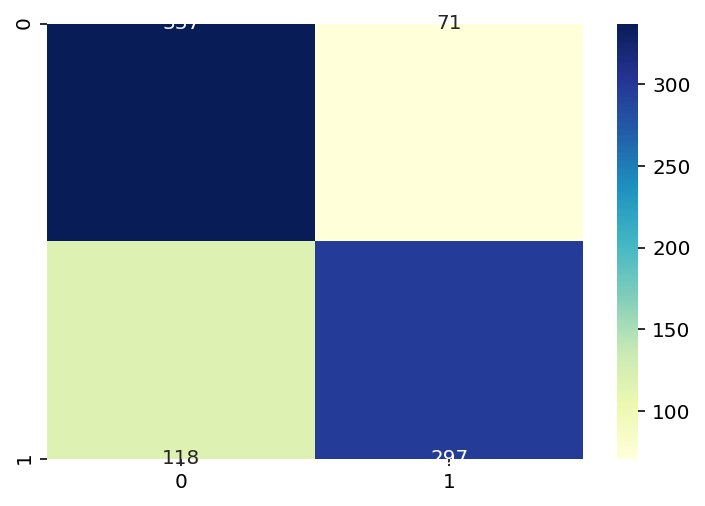

In [93]:
from sklearn.metrics import confusion_matrix
prediction = clf.predict(X_test)
cm_svm = confusion_matrix(y_test, prediction)
sns.heatmap(cm_svm, annot = True, cmap="YlGnBu", fmt = "g")

In [94]:
TN, FP, FN, TP = cm_svm.ravel()

In [95]:
recall = TP / (TP + FN)
recall

0.7156626506024096

In [96]:
precision = TP / (TP + FP)
precision

0.8070652173913043

In [97]:
specificity = TN / (TN + FP)
specificity

0.8259803921568627

In [98]:
F1 = 2 * ((precision * recall) / (precision + recall))
F1

0.7586206896551725

In [99]:
FDR = FP / (TP + FP)
FDR

0.19293478260869565

### Intepretation
The recall, precision, specificity, and F1-score have "descent" proportions. This mean that our trained model is not particularily biasesd toward correctively or incorrectively identifying positive and negative classes. In other words, our model is fair when trying to make prediction on positive and negative classes.

The FDR is relatively low compared to other values, which is a good sign. This means that we only have roughly 20% of the time that the model would incorrectly identify Political Ads as belonging to low-efficiency group when in fact it belongs to high-efficiency group.

### More data Visualization through plotting

We could further examine the data by making a table that indicate whether or not a specific Political Ads are identified as FN, FP, TN, and TP. Then, we will do the following:

* Make a scatter plot of Spend against Impressions distinguished by the table that contains FN, FP, TN, and TP. If there is any specific patterns such as region of concentration, then we can further look into the data and possibly improve the model.

* Make distributions plot of Spend and Impressions distinguished by the table that contains FN, FP, TN, and TP. Each curve represent the value in which each category is most likely to be classified as.

In [100]:
fn = (prediction == 0) & (y_test == 1)
fp = (prediction == 1) & (y_test == 0)
tn = (prediction == 0) & (y_test == 0)
tp = (prediction == 1) & (y_test == 1)

arr = np.vstack([fn,fp,tn,tp]).T

arr

array([[ True, False, False, False],
       [False, False, False,  True],
       [False, False, False,  True],
       ...,
       [False, False, False,  True],
       [False, False,  True, False],
       [False, False, False,  True]])

From this scatter plot, we discovered that almost all of the TP, FN, TN, and FP are clustered in the same region. This implies that when Impression and Spend are located in a specific range, the model will not do a great job on making prediction.

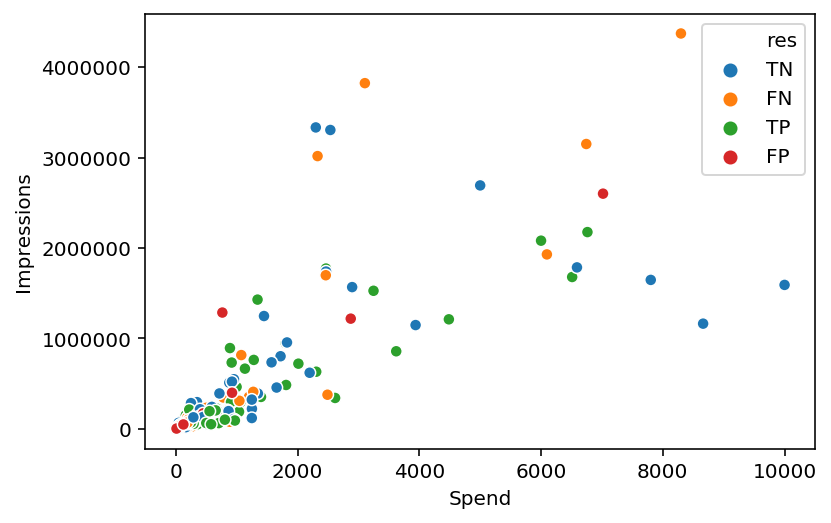

In [101]:
results = pd.DataFrame(arr, columns=['FN', 'FP', 'TN', 'TP']).idxmax(axis=1)
sns.scatterplot(data=X_test.assign(res=results), x='Spend', y='Impressions', hue='res')

We can further examine the same phenomenon that took place in the scatter plot through distributions. Noticed that each curve center roughly around the same mean value(for both Spend and Impression). This implies that the model is not doing great when the Spend and Impression values are located in that specific region(The region around the peaks).

We could also observe the amount of spreadness. From both distributions, the TP seem to have the largest variance. This implies that TP is the hardnest to determine with respect to Spend and Impression because the region(or the confidence interval) is large so the model is more uncertain determining whether or not the political ads are FP by looking at Spend and Impression.

res
FN    AxesSubplot(0.547727,0.125;0.352273x0.755)
FP    AxesSubplot(0.547727,0.125;0.352273x0.755)
TN    AxesSubplot(0.547727,0.125;0.352273x0.755)
TP    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: Impressions, dtype: object

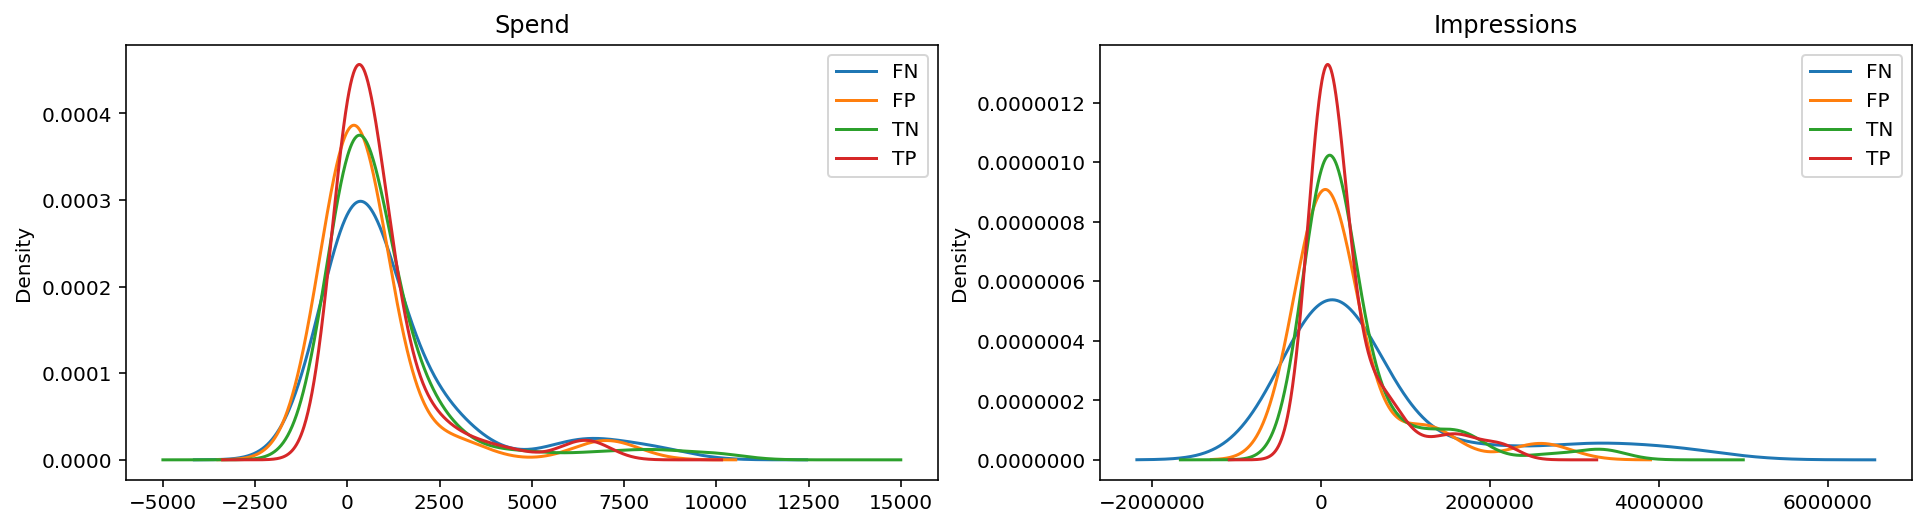

In [102]:
plt.subplots(1,2, figsize = (16, 4))
plt.subplot(1,2,1)
X_test.assign(res=results).groupby('res')["Spend"].plot(kind='kde', legend=True, title="Spend")
plt.subplot(1,2,2)
X_test.assign(res=results).groupby('res')["Impressions"].plot(kind='kde', legend=True, title="Impressions")

### Permutation Test
So far, we had evaluated our final model with recall, precision, specifify, F1, and FDR and plotting such as scatter plot and distribution plot distinguished by TP, TN, FP, FN. However, what if we want to know whether or not our predictions are biased toward a specific category of people? In other words, there may be a difference of recall between Ads that has a targeted a specific gender versus Ads that are inclusive in terms of gender. Therefore, we could perform a permutation test to find out the biases.

* test statistics: Recall(or true positive rate)
* Significance Level: 0.05
* We plan to perform the test on these data: Gender, Segments, AdvancedDemographics, and CreativeProperties.

In [103]:
from sklearn import metrics
perf_df = X_test
prediction = clf_alt.predict(X_test)
perf_df = perf_df.assign(Efficiency_predict = prediction, Efficiency = y_test)

In [104]:
def tpp(df, col_name):
    func = lambda x: metrics.recall_score(x.Efficiency, x.Efficiency_predict)
    obs = df.groupby(col_name).apply(func).diff().abs().iloc[-1]
    metrs = []
    for _ in range(300):
        s = (
            df[[col_name, 'Efficiency', 'Efficiency_predict']]
            .assign(**{col_name:perf_df.Gender.sample(frac=1.0, replace=False).reset_index(drop=True)})
            .groupby(col_name)
            .apply(func)
            .diff()
            .abs()
            .iloc[-1]
        )

        metrs.append(s)
    pd.Series(metrs).plot(kind='hist', title='Permutation Test for Ads Efficiency across different ' + col_name)
    print("p_val: " + str(pd.Series(metrs >= obs).mean()))
    return plt.scatter(obs, 0, c='r')

##### Permutation test on Gender:
* Null hypothesis: The recall score between Ads that target a specific gender and Ads that are inclusive in gender comes from the SAME distriubtion.
* Alternative hypothesis: The recall score between Ads that target a specific gender and Ads that are inclusive in gender comes from DIFFERENT distriubtion.

p_val: 0.13


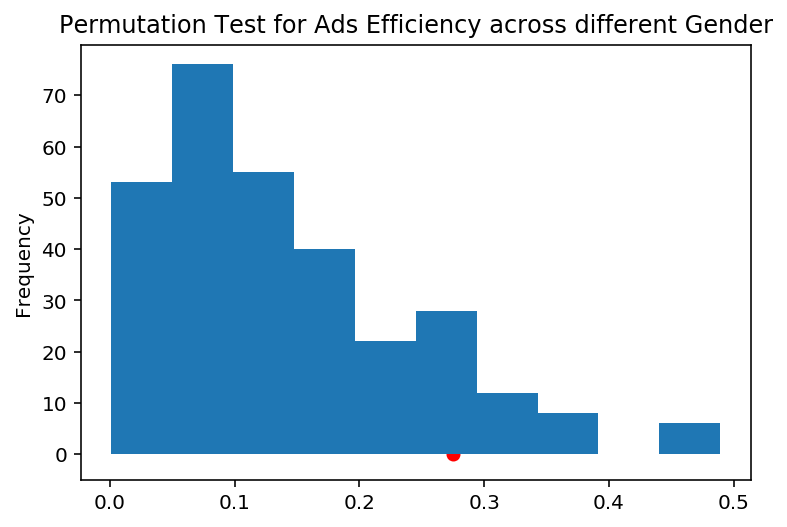

In [105]:
tpp(perf_df, "Gender")

##### Permutation test on Segments:
* Null hypothesis: The recall score between Ads that apply segment criteria and Ads that don't apply segment criteria comes from the SAME distriubtion.
* Alternative hypothesis: The recall score between Ads that apply segment criteria and Ads that don't apply segment criteria comes from DIFFERENT distriubtion.

p_val: 0.08333333333333333


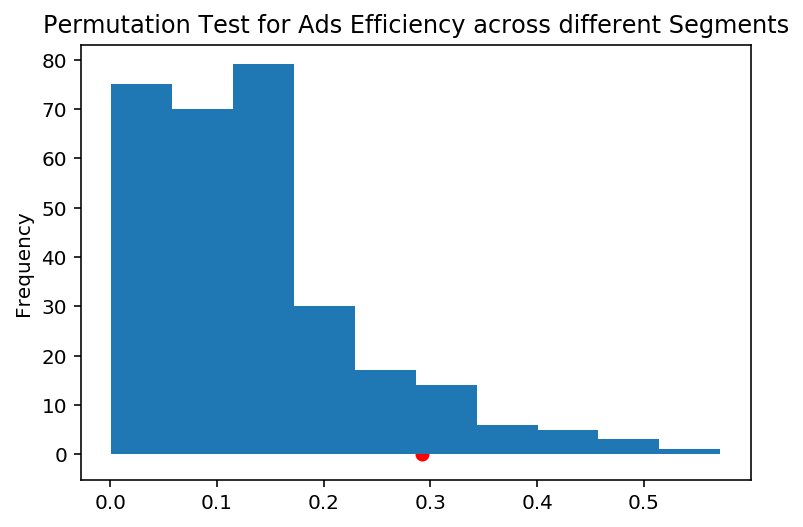

In [106]:
tpp(perf_df, "Segments")

##### Permutation test on AdvancedDemographics:
* Null hypothesis: The recall score between Ads that apply AdvancedDemographics criteria and Ads that don't apply AdvancedDemohraphics criteria comes from the SAME distriubtion.
* Alternative hypothesis: The recall score between Ads that apply AdvancedDemographics criteria and Ads that don't apply AdvancedDemohraphics criteria comes from DIFFERENT distriubtion.

In [ ]:
tpp(perf_df, "AdvancedDemographics")